# Setup

In [6]:
## setup

# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

# MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.transformations import unwrap, wrap

# othes
import seaborn as sns
from tqdm.notebook import tqdm
from glob import glob
from natsort import natsorted
import pandas as pd

# local libs
from Silanizer.Grafter.grafter import Grafting
stylize_plot = Grafting.NewSystem.stylize_plot


# define dictionaries
COLORS = {"water,50":"xkcd:lavender", "water,100":"xkcd:violet", "water,300":"xkcd:plum",
          "toluene,50":"xkcd:lavender", "toluene,100":"xkcd:violet", "toluene,300":"xkcd:plum",
          "water,K0":"xkcd:azure", "water,K1":"xkcd:amber", "water,K2":"xkcd:dark hot pink", "water,K5":"xkcd:seaweed",
          "vacuum,K0":"xkcd:azure", "vacuum,K1":"xkcd:amber", "vacuum,K2":"xkcd:dark hot pink", "vacuum,K5":"xkcd:seaweed",
          "toluene,K0":"xkcd:azure", "toluene,K1":"xkcd:amber", "toluene,K2":"xkcd:dark hot pink", "toluene,K5":"xkcd:seaweed"}

NAMES_BEADS=["DMS","N1P","N1B","N1L","N1L1","W","SW","TW","TOLU","END"]

ATOM_NAMES={"polymer": ["PDMS","DMS"], "bulk": ["BULK","N1B"],"layer": ["LAY","N1L"],"under_polymer": ["PDMS","N1L1"]}

COLORS_BEADS = {"DMS":"xkcd:amber", "END":"xkcd:red", "PDMS":"xkcd:amber", "N1L":"xkcd:gray","N1L1":"xkcd:black","N1B":"xkcd:light gray", "N1P":"xkcd:light gray", "BULK":"xkcd:light gray","LAY":"xkcd:light gray","WALL":"xkcd:light gray", "W":"xkcd:water blue", "SW":"xkcd:water blue", "TW":"xkcd:water blue", "TOLU":"xkcd:sea green"}

MASSES = {"TW":36*1.66054E-24,"SW":54*1.66054E-24,"W":72*1.66054E-24,"SC4":54*1.66054E-24,"TC5":36*1.66054E-24,"DMS":72*1.66054E-24}

CMAPS = {"water":"BuPu", "toluene":"YlGn", "octane":"OrRd", "PDMS":"binary", "vacuum":"magma"}

VOLS = {"W":.46**3*1.122, "SW":.41/2**3*1.122, "TW":.35/2**3*1.122, "DMS":.51**3*1.122, "R1":.41/2**3*1.122, 
                "R2":.34**3*1.122, "R3":.34**3*1.122, "OCT":.47**3*2*1.122}

LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500),
        "50,0.3":(0,50), "50,0.6":(0,75), "50,1.0":(0,85),
        "100,0.3":(0,75), "100,0.6":(0,125), "100,1.0":(0,150),
        "300,0.1":(0,85), "300,0.2":(0,125), "300,0.3":(0,200), "300,0.6":(0,300), "300,1.0":(0,500)},

        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,400), "K5,1.0":(0,500),
        "50,0.3":(0,50), "50,0.6":(0,75), "50,1.0":(0,85),
        "100,0.3":(0,50), "100,0.6":(0,125), "100,1.0":(0,150),
        "300,0.1":(0,85), "300,0.2":(0,125), "300,0.3":(0,200), "300,0.6":(0,300), "300,1.0":(0,500)}}
        
HSPACE = {"water":{"K0,0.1":-0.75, "K0,0.2":-0.75, "K0,0.3":-0.75, "K0,0.6":-0.7, "K0,1.0":-0.75,
        "K1,0.1":-0.75, "K1,0.2":-0.75, "K1,0.3":-0.75, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.75, "K2,0.2":-0.75, "K2,0.3":-0.7, "K2,0.6":-0.65, "K2,1.0":-0.55,
        "K5,0.1":-0.65, "K5,0.2":-0.55, "K5,0.3":-0.4, "K5,0.6":-0.1, "K5,1.0":0.1,
        "50,0.3":-0.75, "50,0.6":-0.7, "50,1.0":-0.65,
        "100,0.3":-0.7, "100,0.6":-0.6, "100,1.0":-0.55,
        "300,0.1":-0.65, "300,0.2":-0.55, "300,0.3":-0.4, "300,0.6":-0.1, "300,1.0":0.1},

        "toluene":{"K0,0.1":-0.75, "K0,0.2":-0.75, "K0,0.3":-0.75, "K0,0.6":-0.7, "K0,1.0":-0.75,
        "K1,0.1":-0.75, "K1,0.2":-0.75, "K1,0.3":-0.75, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.75, "K2,0.2":-0.75, "K2,0.3":-0.7, "K2,0.6":-0.65, "K2,1.0":-0.55,
        "K5,0.1":-0.65, "K5,0.2":-0.55, "K5,0.3":-0.4, "K5,0.6":0.1, "K5,1.0":0.1,
        "50,0.3":-0.75, "50,0.6":-0.7, "50,1.0":-0.65,
        "100,0.3":-0.7, "100,0.6":-0.6, "100,1.0":-0.55,
        "300,0.1":-0.65, "300,0.2":-0.55, "300,0.3":-0.4, "300,0.6":-0.1, "300,1.0":0.1}}

HRATIOS = {"water":{"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
            "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
            "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":2,
            "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":3, "K5,1.0":5.1,
            "50,0.3":1, "50,0.6":2, "50,1.0":2,
            "100,0.3":1, "100,0.6":2, "100,1.0":3,
            "300,0.1":1, "300,0.2":1, "300,0.3":1, "300,0.6":3, "300,1.0":5.1},

            "toluene":{"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
            "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
            "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":2,
            "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":4.1, "K5,1.0":5.1,
            "50,0.3":1, "50,0.6":2, "50,1.0":2,
            "100,0.3":1, "100,0.6":2, "100,1.0":3,
            "300,0.1":1, "300,0.2":1, "300,0.3":1, "300,0.6":3, "300,1.0":5.1}}

COLOR_SOLV = {"water":"xkcd:water blue", "toluene":"xkcd:algae green", "octane":"xkcd:amber", "vacuum":"xkcd:gray"}

COLOR_SAMPLE = {"K0,0.1":"xkcd:azure", "K1,0.1":"xkcd:amber", "K2,0.1":"xkcd:dark hot pink", "K5,0.1":"xkcd:seaweed",
                "K0,0.2":"xkcd:azure", "K1,0.2":"xkcd:amber", "K2,0.2":"xkcd:dark hot pink", "K5,0.2":"xkcd:seaweed",
                "K0,0.3":"xkcd:azure", "K1,0.3":"xkcd:amber", "K2,0.3":"xkcd:dark hot pink", "K5,0.3":"xkcd:seaweed",
                "K0,0.6":"xkcd:azure", "K1,0.6":"xkcd:amber", "K2,0.6":"xkcd:dark hot pink", "K5,0.6":"xkcd:seaweed",
                "K0,1.0":"xkcd:azure", "K1,1.0":"xkcd:amber", "K2,1.0":"xkcd:dark hot pink", "K5,1.0":"xkcd:seaweed",
                "50,0.3":"xkcd:lavender", "100,0.3":"xkcd:plum",
                "50,0.6":"xkcd:lavender", "100,0.6":"xkcd:plum",
                "50,1.0":"xkcd:lavender", "100,1.0":"xkcd:plum",}

COLOR_NREP = {"50":"xkcd:lavender", "100":"xkcd:violet", "300":"xkcd:plum", "K0":"xkcd:azure", "K1":"xkcd:amber", "K2":"xkcd:dark hot pink","K5":"xkcd:seaweed"}

COLOR_GRADIENT = {"K0,0.1":"xkcd:pale cyan", "K0,0.2":"xkcd:bright sky blue", "K0,0.3":"xkcd:azure", "K0,0.6":"xkcd:azul", "K0,1.0":"xkcd:cobalt blue",
                "K1,0.1":"xkcd:pale gold", "K1,0.2":"xkcd:golden yellow", "K1,0.3":"xkcd:yellowish orange", "K1,0.6":"xkcd:pumpkin orange", "K1,1.0":"xkcd:dark orange",
                "K2,0.1":"xkcd:rosa", "K2,0.2":"xkcd:warm pink", "K2,0.3":"xkcd:dark hot pink", "K2,0.6":"xkcd:dark magenta", "K2,1.0":"xkcd:merlot",
                "K5,0.1":"xkcd:seafoam", "K5,0.2":"xkcd:seaweed", "K5,0.3":"xkcd:seaweed green", "K5,0.6":"xkcd:dark sea green", "K5,1.0":"xkcd:spruce",
                "50,0.1":"xkcd:silver", "50,0.2":"xkcd:gray", "50,0.3":"xkcd:black",
                "100,0.1":"xkcd:butterscotch", "100,0.2":"xkcd:burnt yellow", "100,0.3":"xkcd:caramel",
                "300,0.1":"xkcd:lavender", "300,0.2":"xkcd:bright violet", "300,0.3":"xkcd:plum"}

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619],
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# load Roboto-Regular to set as font
from matplotlib import font_manager
path_font = [ f for f in font_manager.findSystemFonts(fontpaths="/gpfs/scratch/ehpc13/Fabio/fonts", fontext="ttf") if "Roboto-Regular" in f][0]
font = font_manager.FontEntry(fname=str(path_font), name="Roboto-Regular")
font_manager.fontManager.ttflist.append(font)

# define font sizes
SIZE_DEFAULT = 10
SIZE_LARGE = 12
plt.rc("font", family=font.name)  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.3/run1/water/nvt/water.1.part0001.gro
64548


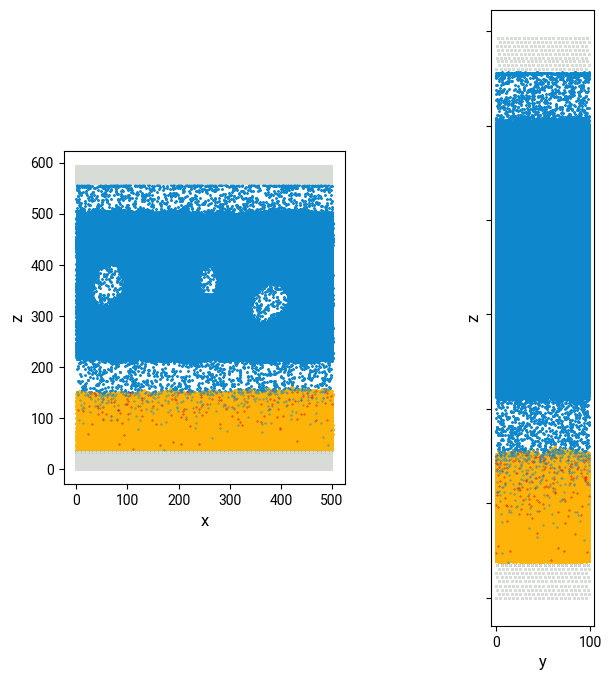

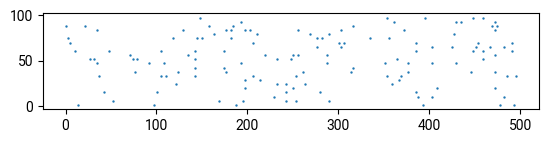

In [3]:
#quick config plot
import re

def rewrite_gro(gro, change_box=False):
    output_file = gro
    modified_lines = []

    with open(gro, "r") as file:
        for line in file:
            if re.match(r'\s*1P', line):
                line = re.sub(r'\bDMS(?=\d|\s)', 'END', line)            
            modified_lines.append(line)

    if change_box:
        x,y,z = modified_lines[-1].split()
        z = str(float(z)+change_box)
        modified_lines[-1] = f"{x} {y} {z}\n"

    with open(output_file, "w") as file:
        file.writelines(modified_lines)

from MDAnalysis.transformations import unwrap, wrap
from MDAnalysis.lib.mdamath import make_whole


ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
SYSTEMS = ["300"]
DENS = [0.3]
RUNS = ["run1"]
SOLV = "water"
PULL = "/nvt"

for SYSTEM in SYSTEMS:
    for DEN in DENS:
        for RUN in RUNS:
            try:
                gro = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}{PULL}/*part*.gro"))[-1]
                #traj = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}{PULL}/*part*.xtc"))[-1]
            except Exception as err:
                print(err)
                continue

            print(gro)
            #print(traj)
            
            #MySys = Grafting.NewSystem(root=ROOT, gro=gro)
            #molSizes = MySys.get_mol_sizes("DMS","molSizes.dat")
            #MySys.make_itps(molSizes, dict_names=ATOM_NAMES)
            #rewrite_gro(gro)

            MySys = Grafting.NewSystem(root=ROOT, gro=gro)
            u = MySys.universe
 
            transform = wrap(u.atoms)
            u.trajectory.add_transformations(transform)
            u.trajectory[-1]

            fig,axes = plt.subplots(1,2,figsize=(8,8),sharey=True)
            fig, axes = MySys.plot_system(universe=u, axes=axes, colors=COLORS_BEADS, names=COLORS_BEADS.keys(), s=0.1)
             
            fig1, ax1 = plt.subplots()
            N1L1 = u.select_atoms("name N1L1")
            print(u.select_atoms("resname SW").n_atoms)
            
            ax1.scatter(N1L1.positions[:,0], N1L1.positions[:,1], s=0.5)
            ax1.set_aspect("equal")
            axes[0].set_aspect("equal")
            axes[1].set_aspect("equal")
            plt.subplots_adjust(wspace=0.1, hspace=0)

# Elasticity

In [ ]:
from MDAnalysis.analysis import density
import cmasher as cmr
from matplotlib.colors import ListedColormap
from scipy.interpolate import interp1d

def run_dens(nframes, NREP, DEN, RUN, SOLV):

    # ---------initial config ---------- #
    u_initial = mda.Universe(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/water_pull.1.part0001.gro", f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/water_pull.1.part0001.xtc")

    totalframes = len(u_initial.trajectory)
    start = int( totalframes - nframes )

    transform = wrap(u_initial.atoms)
    u_initial.trajectory.add_transformations(transform)
    u_initial.trajectory[0]
    water = u_initial.select_atoms("resname W or resname SW or resname TW")
    solid = u_initial.select_atoms("name N1L or name N1L1 or name N1B or name N1P")
    PDMS = u_initial.select_atoms("name DMS or name END")
    
    D = density.DensityAnalysis(water, delta=1.0)
    D.run(start=start, verbose=True)
    grid_W = D.results.density.grid
    grid_Wi = np.mean(grid_W, axis=1)
    df = pd.DataFrame(grid_Wi)
    df.to_csv(f"{ROOT}/out_files/density_profiles/grid_W_{NREP}_initial.csv", index=False)

    D = density.DensityAnalysis(PDMS, delta=1.0)
    D.run(start=start, verbose=True)
    grid_PDMS = D.results.density.grid
    grid_PDMSi = np.mean(grid_PDMS, axis=1)
    df = pd.DataFrame(grid_PDMSi)
    df.to_csv(f"{ROOT}/out_files/density_profiles/grid_PDMS_{NREP}_initial.csv", index=False)


    # -------- trajectory --------- #
    gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/two_fronts/two_fronts*part*.gro"))[-1]
    traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/two_fronts/two_fronts*part*.xtc"))[-1]
    print(gro)
    print(traj)
    u = mda.Universe(gro,traj)
    transform = wrap(u.atoms)
    u.trajectory.add_transformations(transform)

    water = u.select_atoms("resname W or resname SW or resname TW")
    solid = u.select_atoms("name N1L or name N1L1 or name N1B or name N1P")
    PDMS = u.select_atoms("name DMS or name END")

    totalframes = len(u.trajectory)
    start = int( totalframes - nframes )

    D = density.DensityAnalysis(water, delta=1.0)
    D.run(start=start, verbose=True)
    grid_W = D.results.density.grid
    grid_W = np.mean(grid_W, axis=1)
    df = pd.DataFrame(grid_W)
    df.to_csv(f"{ROOT}/out_files/density_profiles/grid_W_{NREP}.csv", index=False)

    D = density.DensityAnalysis(PDMS, delta=1.0)
    D.run(start=start, verbose=True)
    grid_PDMS = D.results.density.grid
    grid_PDMS = np.mean(grid_PDMS, axis=1)
    df = pd.DataFrame(grid_PDMS)
    df.to_csv(f"{ROOT}/out_files/density_profiles/grid_PDMS_{NREP}.csv", index=False)
    
    return grid_Wi, grid_PDMSi, grid_W, grid_PDMS


def cmap_gradient_to_transparent(base_cmap):
    cmap_data = base_cmap(np.arange(base_cmap.N))  # Get the colormap colors
    cmap_data[:, -1] = np.power(np.linspace(0, 1, base_cmap.N), 0.3) # Adjust the alpha values

    return ListedColormap(cmap_data)

def plot_contours(grid_contours, levels, extents, slices, ls, color, alpha, lw, shift=None):
    contours = []
    for grid_contour,level,extent in zip(grid_contours, levels, extents):
        grid_contour[slices[0][0],slices[0][1]] = np.nan
        grid_contour[slices[1][0],slices[1][1]] = np.nan
        grid_contour[slices[2][0],slices[2][1]] = np.nan
        contour = ax.contour(grid_contour[:,:], levels=[level], extent=extent, alpha=0)
        contours.append(contour)

    contour_lines = []
    for c in contours:
        contour_coordinates = []
        for collection in c.collections:
            for path in collection.get_paths():
                # Each path represents a contour line
                vertices = path.vertices
                contour_coordinates.append(vertices)
        contour_coords = np.array(contour_coordinates[0])
        contour_coords = np.array(sorted(contour_coords, key=lambda x: x[0]))
        contour_lines.append(contour_coords)
        if shift:
            sf = shift
        else:
            sf = 0
        ax.plot(contour_coords[:,0], contour_coords[:,1]+sf, ls=ls, c=color, alpha=alpha, lw=lw)
    return contour_lines

# --------------------------------------------------#

ROOTS = ["/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse", "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"]
NREPS = ["300","K5"]
DEN = 0.3
RUN = "run1"
SOLV = "water"

cmap_W_t = cmap_gradient_to_transparent(cmr.arctic_r)
cmap_PDMS_t = cmap_gradient_to_transparent(cmr.sunburst_r)

fig, axes = plt.subplots(2,1, figsize=(4,4.5), gridspec_kw={"hspace":0.3, "height_ratios":[1.2,1]})

for ax,NREP,ROOT in zip(axes,NREPS,ROOTS):

    grid_Wi, grid_PDMSi, grid_W, grid_PDMS = run_dens(300, NREP, DEN, RUN, SOLV)

    grid_Wi= pd.read_csv(f"{ROOT}/out_files/density_profiles/grid_W_{NREP}_initial.csv").values
    grid_PDMSi = pd.read_csv(f"{ROOT}/out_files/density_profiles/grid_PDMS_{NREP}_initial.csv").values
    grid_W = pd.read_csv(f"{ROOT}/out_files/density_profiles/grid_W_{NREP}.csv").values
    grid_PDMS = pd.read_csv(f"{ROOT}/out_files/density_profiles/grid_PDMS_{NREP}.csv").values

    extent_W = [0,grid_W.shape[0]*.1,0,grid_W.shape[1]*.1]
    extent_PDMS = [0,grid_PDMS.shape[0]*.1,0,grid_PDMS.shape[1]*.1]

    im_W = ax.imshow(grid_W.T, cmap=cmap_W_t, origin="lower", extent=extent_W, aspect="equal", zorder=0)
    im_PDMS = ax.imshow(grid_PDMS.T, cmap=cmap_PDMS_t, origin="lower", extent=extent_PDMS, aspect="equal", zorder=1)

    slices = [[slice(None,23),slice(None,None)], [slice(None,None),slice(None,5)], [slice(None,None),slice(-5,None)],
            [slice(-3,None),slice(None,None)], [slice(None,None),slice(None,5)], [slice(None,None),slice(-5,None)],
            [slice(None,23),slice(None,None)], [slice(None,None),slice(None,5)], [slice(None,None),slice(-5,None)]]

    contours = plot_contours([grid_PDMS.T, grid_W.T], [0.003,0.003], [extent_PDMS,extent_W], slices[:-3], "solid", "k", 0.2, 1)

    cts = plot_contours([grid_PDMSi.T], [0.003], [extent_PDMS], slices[-3:], "solid", "red", 0.8, 1, shift=-0.5)
    contours.extend(cts)
    
    contour_coords = contours[-1]
    y = interp1d(contour_coords[:,0], contour_coords[:,1])
    y_intersec = y(12)
    display_coords = ax.transData.transform((12,y_intersec))
    xi,yi = ax.transAxes.inverted().transform(display_coords)
    ax.axvline(12, yi, 0.99, color="red", ls="solid", lw=1, alpha=0.8)
    
    y_intersec = y(50-12)
    display_coords = ax.transData.transform((50-12,y_intersec))
    xi,yi = ax.transAxes.inverted().transform(display_coords)

    ax.axvline(50-12, yi, 0.99, color="red", ls="solid", lw=1, alpha=0.8)
    ax.set_xlim((0,grid_W.shape[0]*.1))
    ax.set_ylim((0, grid_W.shape[1]*.1 - grid_W.shape[1]*.1*0.04))
    ax.tick_params(axis='both', which='both', length=0)
    ax.spines[['left','right','top','bottom']].set_visible(False) 

#axes[0].set_ylim(0,25)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("$x$, nm")
plt.ylabel("$z$, nm")

fig.tight_layout()
fig.savefig(f"{ROOTS[0]}/plots/two_fronts_2.svg", dpi=400)
fig.savefig(f"{ROOTS[0]}/plots/two_fronts_2.png", dpi=400)



# Contact Angle

In [ ]:
from MDAnalysis.transformations import wrap

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SYSTEM = "K5"
DEN = 0.3
RUNS = ["run1","run2","run3"]
SOLV = "water"
CUTS = [100,400,20,350]

cangles = []
for RUN in RUNS:

    gro = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}/CA/*part*.gro"))[-1]
    traj = natsorted(glob(f"{ROOT}/{SYSTEM}/{DEN}/{RUN}/{SOLV}/CA/*part*.xtc"))[-2]

    fig, ax = plt.subplots()
    MySys = Grafting.NewSystem(gro=gro, traj=traj)
    u = MySys.universe
    baseLine = u.select_atoms("name DMS").positions[:,2].max()-u.select_atoms("name DMS").positions[:,2].min()+20
    
    figs, thetas = MySys.calc_contact_angle(fig=[fig,ax], solvent="water", nframes=50, axis=[1], baseLine=baseLine, distFromBase=2, contour=True, cmap="coolwarm", cuts=CUTS, tilt=0, molsDict={"DMS":"xkcd:amber"}, delta=-15)
    fig, ax = figs[0]

    cangles.append(thetas)
    ax.set_xlim(CUTS[0],CUTS[1])
    ax.set_ylim(CUTS[2],CUTS[3])

    fig.savefig(f"{ROOT}/plots/density_CA_{SYSTEM}_{DEN}_{RUN}_{SOLV}.png", dpi=350)

cangles = np.array(cangles)
print(cangles)

# Layer structure

In [8]:
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"

NREPS = ["50","100","300"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1"]
SOLV = "water"
PULL = "equilibrated"

for NREP in NREPS:
    line = []
    for DEN in DENS:
        for RUN in RUNS:
            gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*.part*.gro"))[-1]
            MySys = Grafting.NewSystem(gro=gro)
            u = MySys.universe

            transform = wrap(u.atoms)
            u.trajectory.add_transformations(transform)
            u.trajectory[-1]


            L, std_L = MySys.calc_LayerHeight("name DMS or name END", "name N1L1 or name N1L", grid_size_x=50, grid_size_y=10)        
            line.append([DEN,L, std_L,RUN])
    
    line = np.array(line)
    dfout = pd.DataFrame(line, columns=["dens","L","L_std","run"])
    dfout.to_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv",index=False)


In [ ]:
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"

NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3"]
SOLV = "water"
PULL = "equilibrated"

N0 = 6.02214076E+23
K = 2 * np.pi * ( 3/(4*np.pi*N0) )**(2.0/3.0)
rho = 0.965 * 1E-21

for NREP in NREPS:
    out = []

    for DEN in DENS:
        for RUN in RUNS:

            print(NREP, DEN, RUN)
            gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]
            traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]

            SASA = pd.read_csv(f"{ROOT}/SASA_new/{SOLV}/{NREP}/{DEN}/{RUN}/volume.xvg", skiprows=25, header=None, sep='\\s+', names=["time","vol","dens"]).dropna()
            SASA["dens"] = SASA["dens"] * 1e-24

            rho = SASA["dens"].mean()
            sigma_rho = SASA["dens"].std()

            sigma = DEN * K * ( N[NREP]*74.5/rho  )**(2.0/3.0)
            partial_sigma_rho = (-2 / 3) * DEN * K * (N[NREP] * 74.5)**(2 / 3) * rho**(-5 / 3)
            std_sigma = np.abs(partial_sigma_rho) * sigma_rho

            print(NREP, sigma)
            out.append([DEN,0,0,RUN,sigma,std_sigma])

    out = np.array(out)
    df_out = pd.DataFrame(out, columns=["dens","Rg","std_Rg","run","sigma","std_sigma"])
    df_out.to_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv", index=False)

K0 [0.1, 0.2, 0.3, 0.6, 1.0] [0.7768934927012513, 0.8878268631555845, 1.0032328668214463, 1.3327497584532053, 2.049506205876668] [0.13664441637001326, 0.18440787216809518, 0.19919923839256995, 0.2174318806196209, 0.1930548565858171]
K2 [0.1, 0.2, 0.3, 0.6, 1.0] [1.856176655819089, 2.5627298951163677, 3.6577435801578067, 6.803695351282755, 11.661623476664225] [0.443266398636804, 0.41608762989945464, 0.5011637603012978, 0.2434149164039362, 0.3021622873749035]
K5 [0.1, 0.2, 0.3, 0.6, 1.0] [4.621143405413247, 7.781199389298757, 12.35477747256578, 23.47960987472534, 39.93224395497639] [0.9810490965772033, 1.0013277324493843, 1.9263770210756108, 1.195193263346903, 0.9854579583329589]
K0 [0.3] [0.8870040493481609] [0.2395595876675851]
K2 [0.3] [3.5351599559187887] [0.5133904347269476]
K5 [0.3] [12.017385612428187] [0.8409916554812412]
50 [0.1, 0.2, 0.3, 0.6, 1.0] [1.3609614724844274, 1.7838139247660545, 2.232667428741128, 3.998175921440125, 6.544428066253662] [0.5229018653578495, 0.5089836016

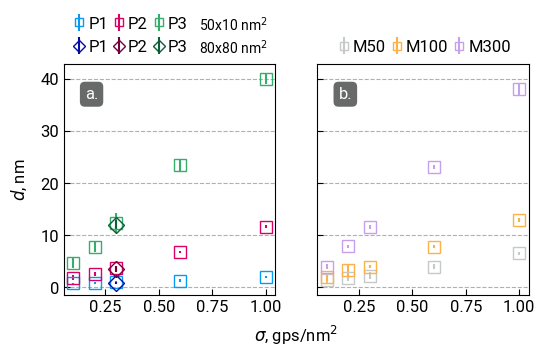

In [3]:
def plot_d(ax,df,NREP,color,label,marker):
    grouped = df.groupby("dens")

    Ls, stds, dens = [], [], []
    for i,group in grouped:
        L = group["L"].mean()
        std = np.sqrt(np.sum(group["L_std"]**2))/len(group)
        den = group["dens"].values
        Ls.append(L)
        stds.append(std)
        dens.append(i)
    print(NREP, dens, Ls, stds)
    h = ax.errorbar(dens, Ls, stds, ls="none", mfc="none", color=color, marker=marker, mec=color, ms=8, label=label)

    return h

fig,ax = plt.subplots(1,2, figsize=(6,3), sharey=True)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
SOLV = "water"
handles = []
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[0],df,NREP,COLOR_GRADIENT[f"{NREP},0.3"],SAMPLE[NREP],"s")
    handles.append(h)

NREPS = ["K0","K2","K5"]
SOLV = "vacuum"
handles_big = []
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[0],df,NREP,COLOR_GRADIENT[f"{NREP},1.0"],SAMPLE[NREP],"D")
    handles_big.append(h)

paired_list = list(zip(handles, handles_big))
handles = [element for pair in paired_list for element in pair]
labels = ["P1","P1","P2","P2","P3","P3"]

ax[0].legend(handles=handles, labels=labels, loc="upper center", ncol=3, handlelength=-0.5, columnspacing=0.9, markerscale=0.8, fontsize=12, framealpha=1, edgecolor="none", bbox_to_anchor=(0.34,1.27))
ax[0].text(0.64, 1.21, s="50x10 nm$^2$", transform=ax[0].transAxes, size=10, color='k', ha='left', va='top')
ax[0].text(0.64, 1.11, s="80x80 nm$^2$", transform=ax[0].transAxes, size=10, color='k', ha='left', va='top')

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100","300"]
SOLV = "water"
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[1],df,NREP,COLOR_GRADIENT[f"{NREP},0.1"],"M"+f"{NREP}","s")

ax[1].legend(loc="upper center", ncol=3, handlelength=-0.5, columnspacing=0.9, markerscale=0.8, fontsize=12, framealpha=1, edgecolor="none", bbox_to_anchor=(0.53,1.17))


for axis,letter in zip(ax,['a.','b.']):
    #axis.set_xticks([0.1,0.2,0.3])
    #axis.set_yticks([0,5,10,15])
    axis.grid(axis="y", ls="dashed")
    stylize_plot(axis,"","", hide=None)
    axis.text(0.1, 0.9, s=letter, transform=axis.transAxes, size=12, color='white', ha='left', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))

axfig = fig.add_subplot(111, frameon=False)
axfig.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
axfig.set_xlabel("$\\sigma$, gps/nm$^2$")
axfig.set_ylabel("$d$, nm")

fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/layer_heights.svg", dpi=450, bbox_inches="tight")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/layer_heights.png", dpi=450, bbox_inches="tight")




# Roughness

In [ ]:
def calc_profiles(ROOT, nreps, dens, runs, solv, pull):
    profiles = {}
    for nrep in nreps:
        fig, ax = plt.subplots()
        dfs = []
        for den in dens:
            for run in runs:

                try:
                    gro = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{solv}/{pull}/*part*.gro"))[-1]
                except Exception as err:
                    print(err)
                    continue

                MySys = Grafting.NewSystem(gro=gro)
                u = MySys.universe
                monomers = u.select_atoms("name DMS")
                bulk = u.select_atoms("name N1B")
                surface = u.select_atoms("name N1L1 or name N1L")
                floor = surface.positions[:,2].max()
                monomers.positions[:,2] = monomers.positions[:,2] - floor

                xrange = np.linspace(0,u.dimensions[0],50)
                xprofile = []      
                xvals = []      
                for i in range(len(xrange)-1):
                    cutbulk = bulk.select_atoms(f"prop x > {xrange[i]} and prop x < {xrange[i+1]}")
                    xvals.append(cutbulk.positions[:,0].mean()*.1)

                    try:
                        cut = monomers.select_atoms(f"prop x > {xrange[i]} and prop x < {xrange[i+1]}")
                        xprofile.append(cut.positions[:,2].max()*.1)
                    except:
                        xprofile.append(0)
                
                toplayer = np.array(xprofile)
                ax.plot(xvals, toplayer, color="xkcd:light gray")   

                data = np.column_stack([xvals,toplayer])
                df_out = pd.DataFrame(data, columns=["x","z"])
                df_out["run"] = run
                df_out["dens"] = den
                dfs.append(df_out)

        df_out = pd.concat(dfs)
        profiles[nrep] = df_out
        df_out.to_csv(f"{ROOT}/out_files/height_profiles/height_profile_{nrep}_{solv}.csv",index=False)

        stylize_plot(ax,"x (nm)","z (nm)")
        fig.savefig(f"{ROOT}/plots/height_profile_{nrep}_{solv}.png",dpi=350)
    return profiles

LOAD = True
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100","300"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1"]
SOLV = "toluene"
PULL = "nvt"

profiles = calc_profiles(ROOT, NREPS, DENS, RUNS, SOLV, PULL)

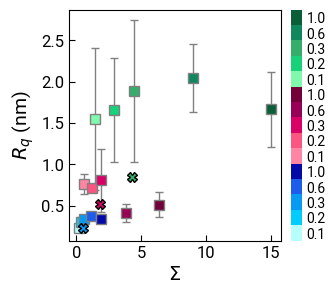

In [9]:
from scipy.integrate import simps
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

def calc_roughness(ROOT, NREP, DENS, RUNS, SOLV, PULL):
    out = []

    for DEN in DENS:
        for RUN in RUNS:
            fig, ax = plt.subplots(1,1, figsize=(4,4))
            
            if RUN == "run4":
                SOLVw = "vacuum"
                PULLw = "nvt"
                grid_size_x = 80
                grid_size_y = 80
                add = "_big"
            else:
                grid_size_x = 50
                grid_size_y = 10
                SOLVw = SOLV
                PULLw = PULL
                add = ""

            try:
                gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLVw}/{PULLw}/*part*.gro"))[-1]
            except Exception as err:
                print(err)
                continue

            MySys = Grafting.NewSystem(gro=gro)
            u = MySys.universe

            transform = wrap(u.atoms)
            u.trajectory.add_transformations(transform)
            u.trajectory[-1]

            LAY = u.select_atoms("name N1L1")
            DMS = u.select_atoms("name DMS")

            DMS.positions[:,2] -= LAY.positions[:,2].max()
            DMS.positions *= .1
            av_x,av_y,av_z = DMS.positions[:,0].mean(), DMS.positions[:,1].mean(), DMS.positions[:,2].mean()
            x = DMS.positions[:,0]
            y = DMS.positions[:,1]
            z = DMS.positions[:,2]

            x_bins = np.linspace(np.min(x), np.max(x), grid_size_x + 1)
            y_bins = np.linspace(np.min(y), np.max(y), grid_size_y + 1)
            grid_x, grid_y = np.meshgrid(np.linspace(np.min(x), np.max(x), grid_size_x),
                                        np.linspace(np.min(y), np.max(y), grid_size_y))

            # Create an array to hold the maximum z-values
            max_z_grid = np.full((grid_size_y, grid_size_x), np.nan)

            # Bin the points and find the maximum z in each bin
            for i in range(grid_size_x):
                for j in range(grid_size_y):
                    mask = (x >= x_bins[i]) & (x < x_bins[i+1]) & (y >= y_bins[j]) & (y < y_bins[j+1])
                    if np.any(mask):
                        max_z_grid[j, i] = np.max(z[mask])


            # Interpolate the max_z_grid over the grid_x and grid_y
            mean_z = np.nanmean(max_z_grid)
            # Calculate the mean square of the z values over the grid
            mean_square_z = np.nanmean((max_z_grid-mean_z)**2)

            # Calculate Rq
            Rq = np.sqrt(mean_square_z)
            print(f"Rq ({NREP},{DEN},{RUN},{SOLV}):", Rq)

            # Plot the interpolated surface (optional)
            im = ax.contourf(grid_x, grid_y, max_z_grid, cmap='viridis')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes('top', size=0.1, pad=0)
            cbar = fig.colorbar(im, ax=ax, cax=cax, orientation='horizontal', location='top', label="$z \\ $ (nm)")
            ax.set_aspect("equal")
            ax.set_xlabel('$x \\ $ (nm)')
            ax.set_ylabel('$y \\ $ (nm)')

            out.append([DEN,Rq,mean_z,RUN])

            fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/height_maps/roughness_{NREP}_{DEN}_{RUN}_{SOLVw}.png",dpi=400, bbox_inches="tight")
            plt.close()

    out = np.array(out)
    df_out = pd.DataFrame(out, columns=["dens","Rq","mean_z","run"])
    print(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLVw}{add}.csv")
    df_out.to_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLVw}{add}.csv", index=False)


#----------- main ---------#

from scipy.interpolate import griddata
from MDAnalysis.transformations import wrap
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SOLV = "water"
PULL = "equilibrated"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
RUNS = ["run1","run2","run3","run4"]
LOAD = True

SAMPLES = ["P1","P2","P3"]
SAMPLE = {"K0":"P1","K2":"P2","K5":"P3"}

# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig,ax = plt.subplots(figsize=(3,3))

for NREP in NREPS:
    if not LOAD:
        calc_roughness(ROOT, NREP, DENS, RUNS, SOLV, PULL)

    df = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLV}.csv")
    sigs = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")

    df = df.merge(sigs, on=["dens","run"])
    df = df[df["dens"].isin(DENS)]
    grouped = df[["dens","Rq","mean_z","run","sigma","std_sigma"]].groupby("dens")

    sig_big = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")
    df_big = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_vacuum_big.csv")
    df_big = df_big.merge(sig_big, on=["dens","run"])
    df_big = df_big[df_big["dens"] == 0.3]
    ax.errorbar(df_big["sigma"], df_big["Rq"], marker="X", mec="k", color=COLOR_GRADIENT[f"{NREP},0.3"], mfc=COLOR_GRADIENT[f"{NREP},0.3"], ms=7, lw=1, ls="none", zorder=1)

    for  DEN, group in grouped:

        Rq = group["Rq"].mean()
        std = group["Rq"].std()
        sigma = group["sigma"].mean()
        std_sigma = group["sigma"].std()
    
        ax.errorbar(sigma, Rq, xerr=std_sigma, yerr=std, marker="s", mec="gray", color="gray", mfc=COLOR_GRADIENT[f'{NREP},{DEN}'], ms=7, capsize=3, lw=1, ls="none", zorder=0)


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

stylize_plot(ax, "$\\Sigma$", "$R_q$ (nm)", hide=False)
#ax.set_xticks([0,2,4,6,8])

fig.savefig(f"{ROOT}/plots/roughness/Rq_sig_{SOLV}.svg", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/Rq_sig_{SOLV}.png", dpi=400, bbox_inches="tight")

# Density maps

/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/K2/0.3/run1/water/equilibrated
/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/K5/0.3/run1/water/equilibrated
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/100/0.3/run1/water/equilibrated
/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/300/0.3/run1/water/equilibrated


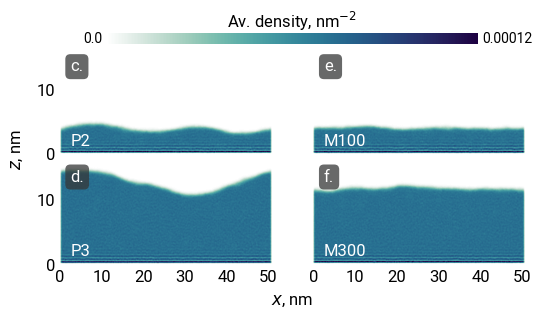

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmasher as cmr

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
ROOT_M = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
SYSTEMS = [[ROOT,"K2",0.3,"run1"],[ROOT,"K5",0.3,"run1"],[ROOT_M,"100",0.3,"run1"],[ROOT_M,"300",0.3,"run1"]]
SOLV ="water"
MOL = "DMS"
NFRAMES = 200
PULL = "equilibrated"
cmap_poly = plt.get_cmap('cmr.ocean_r')
cmap_end = plt.get_cmap('cmr.torch_r')
CMAP = {"DMS":cmap_poly, "END":cmap_end}
VMAX = {"DMS":0.012, "END":0.0008}
LOAD = True
INSET = False
letters = ['c.','d.','e.','f.']
samples = ['P2','P3','M100','M300']

fig, axes = plt.subplots(3,2, figsize=(6,3), sharey=True, gridspec_kw={'height_ratios':[0.1,1,1], 'hspace':0.1})
gs = axes[0,0].get_gridspec()
for ax in axes[0,:]:
    ax.remove()
cax = fig.add_subplot(gs[0,:])
axes1= axes[1:,0].flatten('C')
axes = list(axes1)+list(axes[1:,1].flatten('C'))
imgs = []

for i,SYS in enumerate(SYSTEMS):
    ax = axes[i]
    ROOT, NREP, DEN, RUN = SYS
    print(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}")

    if not LOAD:
        gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]
        traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]
        print(traj)
        MySys = Grafting.NewSystem(gro=gro,traj=traj)

        print(MySys.universe.select_atoms("name END").n_atoms)
        denx, deny, denz, _, _ = MySys.density_profile(MOL, nframes=NFRAMES)
        
        dfdenz = pd.DataFrame(denz)
        dfdenx = pd.DataFrame(denx)
        dfdeny = pd.DataFrame(deny)

        dfdenx.to_csv(f"{ROOT}/out_files/density_profiles/denx_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv",index=False)
        dfdeny.to_csv(f"{ROOT}/out_files/density_profiles/deny_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv",index=False)
        dfdenz.to_csv(f"{ROOT}/out_files/density_profiles/denz_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv",index=False)
    else:
        MySys = Grafting.NewSystem()
        denx = pd.read_csv(f"{ROOT}/out_files/density_profiles/denx_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv").values
        deny = pd.read_csv(f"{ROOT}/out_files/density_profiles/deny_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv").values
        denz = pd.read_csv(f"{ROOT}/out_files/density_profiles/denz_{MOL}_{NREP}_{DEN}_{SOLV}_{RUN}.csv").values

    nrows_x = denx.shape[0]
    ncols_x = denx.shape[1]
    nrows_z = denz.shape[0]
    ncols_z = denz.shape[1]

    img = ax.imshow(denx*0.01, cmap=CMAP[MOL], aspect="auto", interpolation="bicubic", alpha=1.0, origin="lower", vmin=0, vmax=VMAX[MOL]*0.01, extent=[0,ncols_x*0.1,0,nrows_x*0.1])
    imgs.append(img)

    stylize_plot(ax,"","", hide=["left","right","top","bottom"])
    ax.set_xticks([])
    ax.set_ylim(0,16)
    min_color = CMAP[MOL](0)
    ax.set_facecolor(min_color)

    ax.text(0.05, 0.92, s=letters[i], transform=ax.transAxes, size=12, color='white', ha='left', va='top',
                                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))
    ax.text(0.05, 0.05, s=samples[i], transform=ax.transAxes, size=12, color='white', ha='left', va='bottom')

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("$x$, nm")
plt.ylabel("$z$, nm")

cbar = fig.colorbar(imgs[0], cax=cax, orientation='horizontal', location='top', pad=-0.5)

cax.set_xticks([])
cbar.outline.set_edgecolor('none')
cax.text(-0.01, 0.5, cbar.vmin, ha='right', va='center', transform=cax.transAxes)
cax.text(1.01, 0.5, cbar.vmax, ha='left', va='center', transform=cax.transAxes)

pos = cax.get_position()
new_width = pos.width * 0.8
new_x0 = pos.x0 + (pos.width - new_width) / 2
cax.set_position([new_x0, pos.y0, new_width, pos.height])
cax.set_xlabel("Av. density, nm$^{-2}$", size=12)


axes[-1].set_xticks([0,10,20,30,40,50])
axes[1].set_xticks([0,10,20,30,40,50])

fig.savefig(f"{ROOT}/plots/density.svg", dpi=450)
fig.savefig(f"{ROOT}/plots/density.png", dpi=450)

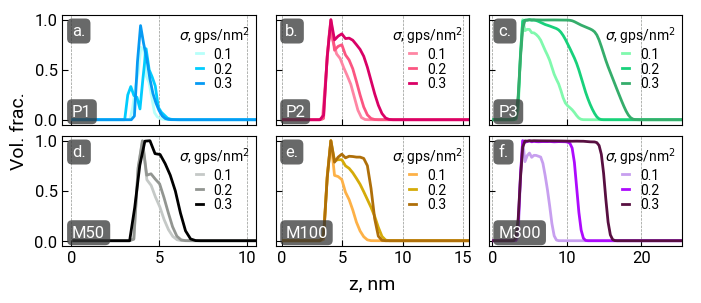

In [24]:
LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500),
        "50,0.1":(0,50), "50,0.2":(0,50), "50,0.3":(0,50),
        "100,0.1":(0,50), "100,0.2":(0,50), "100,0.3":(0,50),
        "300,0.1":(0,50), "300,0.2":(0,50), "300,0.3":(0,85), "300,0.6":(0,300), "300,1.0":(0,500)},

        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,400), "K5,1.0":(0,500),
        "50,0.1":(0,50), "50,0.2":(0,50), "50,0.3":(0,50),
        "100,0.1":(0,50), "100,0.2":(0,50), "100,0.3":(0,50),
        "300,0.1":(0,50), "300,0.2":(0,50), "300,0.3":(0,85), "300,0.6":(0,300), "300,1.0":(0,500)}}


def plot_volfrac(axes, ROOT, NREPS, DENS, SOLVS, RUNS, load=True, plotSolv=False, letters=[""], labels=[""]):
    for i,NREP in enumerate(NREPS):
        for DEN in DENS:
            for SOLV in SOLVS:
                kdePoly, kdeSolv = [],[]   
                for RUN in RUNS:
                    if not load:
                        gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
                        traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.xtc"))[-1]
                        
                        MySys = Grafting.NewSystem(gro=gro,traj=traj)
                        z_SOLV, z_POLY = MySys.position_hist(mol=MOL, nframes=NFRAMES)

                        kde1, kde2 = MySys.calc_kde(z_SOLV=z_SOLV, z_POLY=z_POLY, solvent=SOLV, save=True, outFolder=f"{ROOT}/out_files/density_profiles", system=f"{NREP}_{DEN}_{SOLV}_{RUN}")
                    else:
                        MySys = Grafting.NewSystem()
                        kde1 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{NREP}_{DEN}_{SOLV}_{RUN}_poly.dat").values
                        if plotSolv:
                            kde2 = pd.read_csv(f"{ROOT}/out_files/density_profiles/kde_{NREP}_{DEN}_{SOLV}_{RUN}_solv.dat").values

                    kdePoly.append(kde1)
                    if plotSolv:
                        kdeSolv.append(kde2)

                kdePoly = np.array(kdePoly)
                kdePolyMean = np.mean(kdePoly, axis=0)
                if plotSolv:
                    kdeSolv = np.array(kdeSolv)
                    kdeSolvMean = np.mean(kdeSolv, axis=0)

                MySys.plot_kde(axes[SOLV][i], kdePolyMean[:,0], kdePolyMean[:,1], COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{DEN}", fill=False, zorder=1, alpha=0.2, ls="solid")
                if plotSolv:
                    MySys.plot_kde(axes[SOLV][i], kdeSolvMean[:,0], kdeSolvMean[:,1], "xkcd:water blue", label=f"{SOLV}", fill=False, zorder=1, alpha=0.2, ls="dashed")
                
        axes[SOLV][i].set_ylabel("")
        axes[SOLV][i].set_xlabel("")
        axes[SOLV][i].grid(True, axis='x',color="xkcd:gray", linestyle="--", linewidth=0.5)
        axes[SOLV][i].set_xlim(right=LIMITS[SOLV][f"{NREP},{DEN}"][1]*0.1)
        MySys.stylize_plot(axes[SOLV][i], "", "", hide=None)
        axes[SOLV][i].text(0.05, 0.92, s=letters[i], transform=axes[SOLV][i].transAxes, size=12, color='white', ha='left', va='top',
                                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))
        axes[SOLV][i].text(0.05, 0.05, s=labels[i], transform=axes[SOLV][i].transAxes, size=12, color='white', ha='left', va='bottom',
                                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))


ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLVS = ["water"]
RUNS = ["run1","run2","run3"]
MOL = "DMS"
NFRAMES = 50
LOAD = True

fig, axes = plt.subplots(2,3,figsize=(8,3),sharey='row', sharex='col')
axes_poly = {"water":axes[0,:]}

plot_volfrac(axes_poly, ROOT, NREPS, DENS, SOLVS, RUNS, load=LOAD, letters=['a.','b.','c.'], labels=["P1","P2","P3"])
for i in range(len(axes_poly["water"])):
    axes_poly["water"][i].legend(frameon=True, loc="upper right", bbox_to_anchor=(1.03,1.02), framealpha=0, fontsize=10, labelspacing=0.05, handlelength=0.5, facecolor="white", edgecolor="none", title=f"$\\sigma$, gps/nm$^2$")

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100","300"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLVS = ["water"]
RUNS = ["run1"]
MOL = "DMS"
NFRAMES = 50

axes_mono = {"water":axes[1,:]}
plot_volfrac(axes_mono, ROOT, NREPS, DENS, SOLVS, RUNS, load=LOAD, letters=['d.','e.','f.'], labels=["M50","M100","M300"])
for i in range(len(axes_mono["water"])):
    axes_mono["water"][i].legend(frameon=True, loc="upper right", bbox_to_anchor=(1.03,1.02), framealpha=0, fontsize=10, labelspacing=0.05, handlelength=0.5, facecolor="white", edgecolor="none", title=f"$\\sigma$, gps/nm$^2$")


axes[1,0].set_xticks([0,5,10])
axes[1,1].set_xticks([0,5,10,15])
axes[1,2].set_xticks([0,10,20])
axes[1,0].set_xlim([-0.5,10.5])
axes[1,1].set_xlim([-0.5,15.5])
axes[1,2].set_xlim([-0.5,25.5])


ax_frame = fig.add_subplot(111, frameon=False)
ax_frame.set_xlabel("z, nm", size=14)
ax_frame.set_ylabel("Vol. frac.", size=14)
ax_frame.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/density_profiles/comparison_density_profiles.svg", dpi=450, bbox_inches="tight")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/density_profiles/comparison_density_profiles.png", dpi=450, bbox_inches="tight")

# Chain length segregation

In [ ]:
#<R(n)^2>/n

def extract_sequences(arr):
    sequences = []
    current_sequence = []

    for i in range(len(arr)):
        if i > 0 and arr[i] != arr[i - 1] + 1:
            sequences.append(current_sequence)
            current_sequence = []

        current_sequence.append(arr[i])

    # Append the last sequence
    if current_sequence:
        sequences.append(current_sequence)

    return sequences

import subprocess
from MDAnalysis.analysis.distances import self_distance_array as dist
from MDAnalysis.transformations import NoJump

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K5"]
DENS = [0.6]
SOLV = "water"
RUNS = ["run1","run2","run3"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
dist_n = {}

for system in SYSTEMS:

    for sys in system:
        nrep,den,run = sys.split(",")
    
        filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*.part*.gro"))
        trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

        try:
            gro = filenames[-1]
            traj = trajnames[-1]
        except:
            continue

        command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
        subprocess.run(f"cd {ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated;"+
                        command,
                        shell=True, executable="/bin/bash")
        
        df = pd.read_csv(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
        u = mda.Universe(gro,traj)

        pdms = u.select_atoms("name DMS")
        indices = pdms.indices

        resnames = [f"resname P{num} " for num in df["nmol"].values ]
        molSizes = [int(s.split("P")[1]) for s in resnames]
        maxMolSize = np.max(molSizes)

        dist_n[sys] = {m:[] for m in range(1,maxMolSize+1)}

        for ts in u.trajectory[-10:]:
            positions = {}
            for resname in resnames[:]:

                indices = u.select_atoms(f"{resname}").indices
                sequence = extract_sequences(indices)
                positions[resname.split(" ")[1]] = []

                for seq in sequence:
                    
                    monomers = u.select_atoms(f"index {seq[0]}:{seq[-1]}")
                    pos = monomers.positions
                    positions[resname.split(" ")[1]].append(pos)

                    dists = dist(monomers, backend="OpenMP")
                    lenMol = len(monomers)

                    i = 0
                    for j in range(lenMol-1,1,-1):
                        dists_cut = dists[i:i+j]
                        k = 1
                        for l in dists_cut:
                            dist_n[sys][k].append(l)
                            k += 1
                        i += j

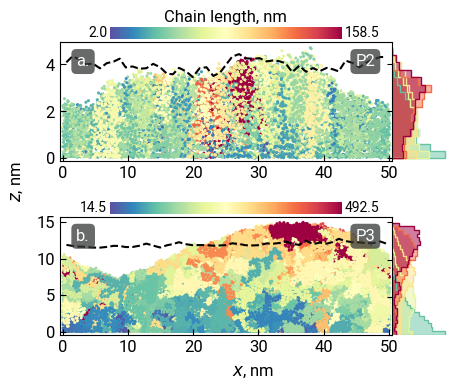

In [10]:
from MDAnalysis.transformations import wrap
import subprocess
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

def adjust_hist_aspect(ax1, ax2):
    pos1 = ax1.get_position()
    pos2 = ax2.get_position()

    # Set the position of ax2 to match ax1 in the y-direction
    ax2.set_position([pos2.x0, pos1.y0, pos2.width, pos1.height])


def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")

def plot_histograms(ax1, ax2, df, color, xrange, bins):
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(True)
    ax1.set_xlim(-0.5,50.5)
    ax1.set_ylim(bottom=-0.5)
    y1, y2 = ax1.get_ylim()

    ax2.hist(df["z"], bins=bins, density=True, range=xrange, orientation="horizontal", color=color, alpha=0.5, histtype="stepfilled")
    ax2.hist(df["z"], bins=bins, density=True, range=xrange, orientation="horizontal", color=color, alpha=1.0, histtype="step", lw=1)

    ax2.set_xticks([])
    ax2.set_yticklabels([])
    ax2.set_ylim(y1, y2)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(True)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SOLV = "water"
BINS = { "K0":10, "K1":20, "K2":15, "K5":30 }
SYSTEMS = [["K2",0.3,"run2"],["K5",0.3,"run3"]]
SYSTEMS_MONO = [["100",0.3,"run1"],["300",0.3,"run1"]]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
FRAMES = 1

import matplotlib
cmap = matplotlib.colormaps['Spectral_r']
ngroups = 6
colors_dens = cmap(np.linspace(0, 1, ngroups))
x_shift = -15
mol = "DMS"

LcutList = {}

# Create a 3x2 grid with a width ratio of 6:1
fig = plt.figure(figsize=(5,4))
gs = GridSpec(5, 2, figure=fig, width_ratios=[6,1], height_ratios=[0.1,1,0.3,0.1,1], wspace=0, hspace=0.05)

mains = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[4,0])]
hists = [fig.add_subplot(gs[1,1]), fig.add_subplot(gs[4,1])]
axes_cbar = [fig.add_subplot(gs[0,:-1]), fig.add_subplot(gs[3,:-1])]
letters = ["a.", "b."]

ax_list = []
axhist_list = []
cbars_list = []
for ax1,ax2,ax_cbar,SYS,SYS_MONO,letter in zip(mains, hists, axes_cbar,SYSTEMS, SYSTEMS_MONO, letters):
    NREP,DEN,RUN = SYS
    NREP_mono, DEN_mono, RUN_mono = SYS_MONO

    hprof = pd.read_csv(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse/out_files/height_profiles/height_profile_{NREP_mono}_{SOLV}.csv") 
    hprof = hprof[hprof["dens"]==DEN]

    ax_list.append(ax1)
    axhist_list.append(ax2)

    gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
    traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*nojump*.xtc"))[-1]

    get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated", SOLV)
    df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
    MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

    transform = wrap(MySys.universe.atoms)
    MySys.universe.trajectory.add_transformations(transform)
    MySys.universe.trajectory[-1]
    universe = MySys.universe
    u = universe.select_atoms(f"name {mol}")

    dfs = []
    for ts in universe.trajectory[-FRAMES:]:
        df = pd.DataFrame({"x":u.atoms.positions[:,0], "y":u.atoms.positions[:,1], "z":u.atoms.positions[:,2], "lengths":[int(r[1:]) for r in u.atoms.residues.resnames]})
        df[["x","y","z"]] = df[["x","y","z"]]*.1
        df["z"] -= df["z"].min()
        dfs.append(df)

    df = pd.concat(dfs)
    box_length = df["x"].max()-df["x"].min()
    
    # Transpose points along x-axis
    df["x"] += x_shift
    df["x"] = df["x"] % box_length
    zmin, zmax = df["z"].min(), df["z"].max()

    # Plot the main plot on the left
    maxL = df["lengths"].max()
        
    # Plot the main plot on the left
    im = ax1.scatter(df["x"], df["z"], c=df["lengths"]*0.5, cmap=cmap, alpha=1, s=5, ec="none")
    ax1.plot(hprof["x"],hprof["z"]-3.4, c="k", ls="dashed", lw=1.5, zorder=3)
    ax1.set_xlim(0,50)
    ax1.text(0.05, 0.9, s=letter, transform=ax1.transAxes, size=12, color='white', ha='left', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))
    ax1.text(0.95, 0.9, s=SAMPLE[NREP], transform=ax1.transAxes, size=12, color='white', ha='right', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))

    Lcuts = np.linspace(0,maxL,ngroups)
    LcutList[f"{NREP,DEN,RUN}"] = Lcuts

    #Plot the histograms on the right
    for j in range(len(Lcuts)-1):
        cut = df[((df["lengths"] >= Lcuts[j])) & (df["lengths"] <= Lcuts[j+1])]
        plot_histograms(ax1, ax2, cut, colors_dens[j+1], xrange=(zmin,zmax), bins=BINS[NREP])


    cax = ax_cbar
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal', location='top')
    cax.set_xticks([])
    cbar.outline.set_edgecolor('none')
    cax.text(-0.01, 0.5, f"{np.round(cbar.vmin,1)}", ha='right', va='center', transform=cax.transAxes)
    cax.text(1.01, 0.5, f"{np.round(cbar.vmax,1)}", ha='left', va='center', transform=cax.transAxes)

    cbar.outline.set_edgecolor('none')
    pos = ax_cbar.get_position()
    new_width = pos.width * 0.7
    new_x0 = pos.x0 + (pos.width - new_width) / 2
    ax_cbar.set_position([new_x0, pos.y0, new_width, pos.height])
    cbars_list.append(cbar)

for ax in ax_list[:-1]:
    stylize_plot(ax, "", "", hide=None)
    ax.set_ylim(bottom=-0.1)
for axh in axhist_list:
    axh.set_ylim(bottom=-0.1)

stylize_plot(ax_list[-1],"", "", hide=None)

ax_list[0].set_yticks([0,2,4])
ax_list[1].set_yticks([0,5,10,15])
axhist_list[0].set_yticks([0,2,4])
axhist_list[1].set_yticks([0,5,10,15])
axhist_list[0].set_yticklabels([])
axhist_list[1].set_yticklabels([])

cbars_list[0].ax.set_xlabel("Chain length, nm", size=12)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("$x$, nm")
plt.ylabel("$z$, nm")

fig.savefig(f"{ROOT}/plots/chain_lengths_Fig4.png", dpi=600, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/chain_lengths_Fig4.svg", dpi=450, bbox_inches="tight")


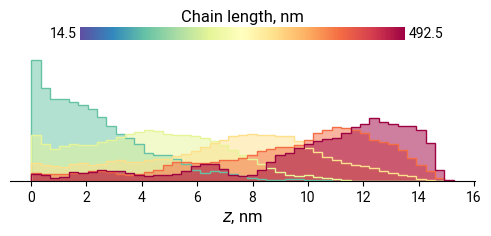

In [21]:
import matplotlib
from MDAnalysis.transformations import wrap
import subprocess

def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")
                        
cmap = matplotlib.colormaps['Spectral_r']
ngroups = 6
colors_dens = cmap(np.linspace(0, 1, ngroups))

ROOT, NREP, DEN, RUN, SOLV = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse", "K5", 0.3, "run3", "water"


gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*nojump*.xtc"))[-1]

get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated", SOLV)
df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

transform = wrap(MySys.universe.atoms)
MySys.universe.trajectory.add_transformations(transform)
MySys.universe.trajectory[-1]
universe = MySys.universe
u = universe.select_atoms(f"name DMS or name END")

dfs = []
for ts in universe.trajectory[-20:]:
    df = pd.DataFrame({"x":u.atoms.positions[:,0], "y":u.atoms.positions[:,1], "z":u.atoms.positions[:,2], "lengths":[int(r[1:]) for r in u.atoms.residues.resnames]})
    df[["x","y","z"]] = df[["x","y","z"]]*.1
    df["z"] -= df["z"].min()
    dfs.append(df)

df = pd.concat(dfs)

zmin, zmax = df["z"].min(), df["z"].max()

# Plot the main plot on the left
maxL = df["lengths"].max()
    
Lcuts = np.linspace(0,maxL,ngroups)

fig,axes = plt.subplots(2,1,figsize=(6,2), gridspec_kw={"height_ratios":(0.1,1)})
ax = axes[1]
ax_cbar = axes[0]

for j in range(len(Lcuts)-1):
    cut = df[((df["lengths"] >= Lcuts[j])) & (df["lengths"] <= Lcuts[j+1])]
    im = ax.hist(cut["z"], bins=45, density=True, range=(zmin, zmax), color=colors_dens[j+1], alpha=0.5, histtype="stepfilled")
    ax.hist(cut["z"], bins=45, density=True, range=(zmin, zmax), color=colors_dens[j+1], alpha=1.0, histtype="step", lw=1)

    ax.set_yticks([])
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

cax = ax_cbar
norm = matplotlib.colors.Normalize(vmin=df["lengths"].min()*.5, vmax=df["lengths"].max()*.5)
cbar = matplotlib.colorbar.ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal', location='top')
cax.set_xticks([])
cbar.outline.set_edgecolor('none')
cax.text(-0.01, 0.5, f"{np.round(cbar.vmin,1)}", ha='right', va='center', transform=cax.transAxes)
cax.text(1.01, 0.5, f"{np.round(cbar.vmax,1)}", ha='left', va='center', transform=cax.transAxes)

cbar.outline.set_edgecolor('none')
pos = ax_cbar.get_position()
new_width = pos.width * 0.7
new_x0 = pos.x0 + (pos.width - new_width) / 2
ax_cbar.set_position([new_x0, pos.y0, new_width, pos.height])
ax_cbar.set_xlabel("Chain length, nm", size=12)

axes[1].set_xlabel("$z$, nm")

fig.savefig(f"{ROOT}/plots/hist.svg", bbox_inches="tight", dpi=400)

In [ ]:
from MDAnalysis.transformations import wrap
import subprocess
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import cmasher as cmr

import matplotlib
cmap = matplotlib.colormaps['cmr.bubblegum_r']
ngroups = 6
colors_dens = cmap(np.linspace(0, 1, ngroups))

def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")

def plot_histograms(ax1, ax2, df, color, xrange, bins):
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(True)
    ax1.set_xlim(-0.5,50.5)
    ax1.set_ylim(bottom=-0.5)
    y1, y2 = ax1.get_ylim()

    ax2.hist(df["z"], bins=bins, density=False, range=xrange, orientation="horizontal", color=color, alpha=0.7, histtype="stepfilled", edgecolor="none")
    #ax2.hist(df["z"], bins=bins, density=False, range=xrange, orientation="horizontal", color=color, alpha=1.0 histtype="step", lw=1)

    ax2.set_xticks([])
    ax2.set_yticklabels([])
    ax2.set_ylim(y1, y2)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(True)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
SOLV = "water"
BINS = { "K0":10, "K1":20, "K2":20, "K5":25, "300":50 }
SYSTEM = ["300","0.3","run1"]
FRAMES = 100

import matplotlib
#cmap = matplotlib.colormaps['Spectral_r']
#ngroups = 6
#colors_dens = cmap(np.linspace(0, 1, ngroups))

x_shift = -15
mol = "END"

#LcutList = {}

# Create a 3x2 grid with a width ratio of 6:1
fig = plt.figure(figsize=(6,3))
gs = GridSpec(1, 2, figure=fig, width_ratios=[6,1], wspace=0)

#ax_cbar = fig.add_subplot(gs[0,:-1])
#bbox = ax_cbar.get_position()
#new_bbox = (bbox.x0, bbox.y0-0.04, bbox.width, bbox.height)
#ax_cbar.set_position(new_bbox)
#ax_cbar.axis("off")

NREP,DEN,RUN = SYSTEM

#if i > 0:
#    ax1 = fig.add_subplot(gs[i+1,0], sharex=ax_list[i-1])
#else:
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)

gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/**.xtc"))[-1]

get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated", SOLV)
df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

transform = wrap(MySys.universe.atoms)
MySys.universe.trajectory.add_transformations(transform)
MySys.universe.trajectory[-1]
universe = MySys.universe
u = universe.select_atoms(f"name {mol}")

dfs = []
for ts in universe.trajectory[-FRAMES:]:
    df = pd.DataFrame({"x":u.atoms.positions[:,0], "y":u.atoms.positions[:,1], "z":u.atoms.positions[:,2], "lengths":[int(r[1:]) for r in u.atoms.residues.resnames]})
    df[["x","y","z"]] = df[["x","y","z"]]*.1
    df["z"] -= df["z"].min()
    dfs.append(df)

df = pd.concat(dfs)
box_length = df["x"].max()-df["x"].min()

# Transpose points along x-axis
df["x"] += x_shift
df["x"] = df["x"] % box_length
zmin, zmax = df["z"].min(), df["z"].max()
    
# Plot the main plot on the left
im = ax1.scatter(df["x"], df["z"], c=df["z"], cmap=cmap, alpha=0.7, s=5, ec="none")
im.set_clim(df["z"].min()-0.5, df["z"].max()+0.5)
ax1.set_xlim(0,50)
ax1.set_ylim(df["z"].min()-0.5, df["z"].max()+0.5)
Lcuts = np.linspace(0,zmax,ngroups)

#Plot the histograms on the right
for i in range(len(Lcuts)-1):
    cut = df[((df["z"] >= Lcuts[i])) & (df["z"] <= Lcuts[i+1])]
    plot_histograms(ax1, ax2, cut, colors_dens[i+1], xrange=(zmin,zmax), bins=BINS[NREP])

# Plot histogram on the right
stylize_plot(ax1,"$x$ (nm)", "", hide=["right"])


divider = make_axes_locatable(ax1)
cax = divider.append_axes('left', size="5%", pad=0)
cbar = fig.colorbar(im, cax=cax, orientation='vertical', location='left')
cbar.ax.set_ylabel("$z_{end}$ (nm)", size=14, labelpad=0)
cbar.ax.tick_params(labelsize=12)
cbar.outline.set_edgecolor('none')
cbar.ax.tick_params(which='both', size=2)

fig.savefig(f"{ROOT}/plots/chain_lengths/{mol}_chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.png", dpi=450, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/chain_lengths/{mol}_chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.svg", dpi=450, bbox_inches="tight")


In [ ]:
#util libs
import numpy as np
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None 

from mpl_toolkits.mplot3d import Axes3D

from MDAnalysis.transformations import wrap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K5"]
DEN = 0.6
SOLV = "water"
RUN = "run1"

import matplotlib
from matplotlib import cm

cmap = matplotlib.colormaps['Spectral_r']

LcutList = {}

for NREP in NREPS:

    df = pd.read_csv(f"{ROOT}/out_files/chain_length/chains_{NREP}_{DEN}_{RUN}_{SOLV}.csv")
    print(df['id'].unique())
    print(df['lengths'].unique())
    
    first_occurrences = df.drop_duplicates(subset='lengths', keep='first')
    first_ids = first_occurrences['id']
    df = df[df['id'].isin(first_ids)]
    
    norm = matplotlib.colors.Normalize(vmin=0, vmax=df["lengths"].max())
    lengths = df['lengths'].unique()

    print(lengths)

    color_discrete_map={l:c/255 for l,c in zip(lengths,cm.Spectral_r(norm(lengths),bytes=True))}

    fig = px.scatter_3d(df, x='x', y='y', z='z',color='lengths', color_discrete_sequence=px.colors.qualitative.Alphabet, color_discrete_map=color_discrete_map)
    fig.update_traces(marker=dict(size=2))

    fig.show()
    #fig.savefig(f"{ROOT}/plots/chains_in_box_{NREP}_{DEN}_{RUN}_{SOLV}.png", dpi=350, bbox_inches="tight")
            #plt.savefig(f"{ROOT}/plots/chain_lengths_{NREP}_{DEN}_{RUN}_{SOLV}.svg", dpi=100, bbox_inches="tight")


# MSD

In [ ]:
#plot_msd
from matplotlib.lines import Line2D

def roll_av(df_msd, n):
    std = pd.DataFrame()
    roll = pd.DataFrame()

    roll["MSD"] = df_msd["MSD"].rolling(window=n).mean().dropna()
    roll["z"]= df_msd["z"].rolling(window=n).mean().dropna()
    std["MSD"] = df_msd["MSD"].rolling(window=n).std().dropna()
    roll["z"] = (roll["z"]-roll["z"].min())/(roll["z"].max()-roll["z"].min())
    std["z"] = roll["z"].values

    return roll, std

def plot_hists(ax1, ax1_histx, ax1_histy, df_msd, color, zorder=1):
    hist,bins = np.histogram(df_msd["z"],bins=np.linspace(0,1,50))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histx.hist(df_msd["z"], bins=np.linspace(0,1,50), weights=weights, alpha=0.5, edgecolor="none", facecolor=color,zorder=zorder)

    hist,bins = np.histogram(df_msd["MSD"],bins=np.logspace(1,3.5))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histy.hist(df_msd["MSD"], bins=np.logspace(1,3.5), weights=weights, orientation='horizontal', alpha=0.5, color=color,zorder=zorder)

    ax1.set_yscale("log"); ax1_histy.set_yscale("log")
    ax1_histx.set_xlim(ax1.get_xlim()); ax1_histy.set_ylim(ax1.get_ylim())
    ax1_histy.set_xticks([]); ax1_histx.set_yticks([])
    ax1_histy.set_yticklabels([]); ax1_histx.set_xticklabels([])
    ax1_histx.spines["left"].set_visible(False); ax1_histy.spines["bottom"].set_visible(False)
    ax1.set_ylim((10,1500))


def plot_positions(ax, df_pos_all, vmin=0, vmax=1000, ylim=(0,500)):
    df_pos_all["z"] = df_pos_all["z"] - df_pos_all["z"].min()
    im1 = ax[0].scatter(df_pos_all["x"], df_pos_all["z"], c=df_pos_all["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=8, alpha=1, zorder=1, vmin=vmin, vmax=vmax)
    im2 = ax[1].scatter(df_pos_all["x"], df_pos_all["y"], c=df_pos_all["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=8, alpha=1, zorder=1, vmin=vmin, vmax=vmax)
    MySys.stylize_plot(ax[0],"","z ($\\AA$)")
    MySys.stylize_plot(ax[1],"","y ($\\AA$)")

    ax[0].set_xlim(0,500); ax[0].set_ylim(ylim)
    ax[1].set_xlim(0,500); ax[1].set_ylim(0,100)
    ax[0].set_aspect("equal"); ax[1].set_aspect("equal")

    return im1, im2

def plot_roll(ax1, df_msd, color, n=500, zorder=-1, label=""):
    roll, std = roll_av(df_msd, n)
    ax1.plot(roll["z"], roll["MSD"], ls ="solid", c="white", zorder=i, lw=3.5)
    ax1.plot(roll["z"], roll["MSD"], ls ="solid", c=color, zorder=i, lw=2.5, label=label)
    ax1.fill_between(roll["z"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], alpha=0.2, color=color, edgecolor="none", zorder=zorder)
    ax1.legend(frameon=False, loc="upper right", handlelength=1)    


def plot_msd_time(ax2, ax2_inset, df_msd_time, color, n=-100):
    ax2.plot(df_msd_time["time"][:n], df_msd_time["MSD"][:n], label=f"{nrep},{den}", lw=3, color=color)
    ax2.legend(frameon=False, loc="lower right", edgecolor="xkcd:light gray", facecolor="white", framealpha=0.6)
    D = MySys.diffusivity(df_msd_time["time"]*.001, df_msd_time["MSD"], 0, 3)
    ax2_inset.scatter(nrep, D, marker="o", color=color)

def stylize_plots(ax1, ax1_histy, ax1_histx, ax2, ax2_inset, fig, axes, im3, system):
    MySys.stylize_plot(ax1,"(z-z$_{min}$)/(z$_{max}$-z$_{min}$) ($\\AA$)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax1_histy,"",""); MySys.stylize_plot(ax1_histx,"","")
    MySys.stylize_plot(ax2,"t (ps)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax2_inset,"","D ($\\AA^2$/ns)",labelsize=10,ticksize=10)

    axes[0,0].set_ylabel("z ($\\AA$)", size=12)
    axes[0,1].set_ylabel(""); axes[0,2].set_ylabel("")
    axes[1,0].set_ylabel("y ($\\AA$)", size=12)
    axes[1,1].set_ylabel(""); axes[1,2].set_ylabel("")
    
    ax_fig = fig.add_subplot(111, frameon=False)
    ax_fig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax_fig.set_xlabel("x ($\\AA$)", size=12)
    ax_fig.set_ylabel("", size=12)

    cbar_ax = fig.add_axes([0.83, 0.3, 0.015, 0.4])
    fig.colorbar(im3, cax=cbar_ax, extend='max', label="MSD ($\\AA^2$)")

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
RUNS = ["run1"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
SOLV = "water"
NFRAMES = 100
MARKERS = ["o","s","^","D"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
LOAD = False

for system in SYSTEMS:
    fig,axes = plt.subplots(2,3,figsize=(8,5), sharex=True, sharey="row", height_ratios=(3,1))
    fig1 = plt.figure()
    fig2,ax2 = plt.subplots()
    ax2_inset = fig2.add_axes([0.2, 0.65, 0.25, 0.2])

    # Create the Axes for border histograms
    gs = fig1.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    ax1 = fig1.add_subplot(gs[1, 0])
    ax1_histx = fig1.add_subplot(gs[0, 0])
    ax1_histy = fig1.add_subplot(gs[1, 1])
    
    i=0
    for sys in system:
        nrep,den,run = sys.split(",")
        print(f"System: {nrep} / density: {den} /  Run: {run}")
        
        if not LOAD:
            gros = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*part*.gro"))
            trajs = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))
            MySys = Grafting.NewSystem(gro=gros[-1], traj=trajs[-1])
            u = MySys.universe

            df_pos_all, df_pos_close, df_msd_time = MySys.calc_MSD(polyname="DMS", nframes=NFRAMES)
            df_pos_all = df_pos_all[(df_pos_all["x"]>0) & (df_pos_all["x"]<500) & (df_pos_all["y"]>0) & (df_pos_all["y"]<100)]

            df_msd = df_pos_all.copy().sort_values("z")
            df_msd["z"] = (df_msd["z"]-df_msd["z"].min())/(df_msd["z"].max()-df_msd["z"].min())

            df_msd.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_{sys}.dat",index=False)
            df_msd_time.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_time_{sys}.dat",index=False)
            df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_{sys}.dat",index=False)

        else:
            MySys = Grafting.NewSystem()
            df_msd = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_{sys}.dat")
            df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_time_{sys}.dat")
            df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_{sys}.dat")

        #plot MSD x time
        plot_msd_time(ax2, ax2_inset, df_msd_time, COLOR_NREP[nrep], n=-10)        

        #plot histograms
        plot_roll(ax1, df_msd, COLOR_NREP[nrep], 100, zorder=-i, label=nrep)
        plot_hists(ax1, ax1_histx, ax1_histy, df_msd, COLOR_NREP[nrep], zorder=-i)

        #plot positions with MSD
        im1, im2 = plot_positions(axes[:,i], df_pos_all, 0, 600, (0,300))
        i += 1

    stylize_plots(ax1, ax1_histy, ax1_histx, ax2, ax2_inset, fig, axes, im2, system)
    fig.subplots_adjust(hspace=0.2, wspace=0.3, right=0.8, left=0.1, top=0.7, bottom=0.3)

    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_pos_{den}_{run}_allbeads.svg", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_{den}_{run}_allbeads.svg", dpi=350, bbox_inches='tight')
    fig2.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_{den}_{run}_time_allbeads.svg", dpi=350, bbox_inches='tight')

    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_pos_{den}_{run}_allbeads.png", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_{den}_{run}_allbeads.png", dpi=350, bbox_inches='tight')
    fig2.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_{den}_{run}_time_allbeads.png", dpi=350, bbox_inches='tight')


In [ ]:
#calculate and plot_msd by positions

def plot_positions(axes, df_pos_all, df_pos_close, vertlines=False, vmin=0, vmax=1000, ylim=(0,500)):
   
    axes[0].scatter(df_pos_all["x"], df_pos_all["z"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im1 = axes[0].scatter(df_pos_close["x"], df_pos_close["z"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    axes[1].scatter(df_pos_all["x"], df_pos_all["y"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im2 = axes[1].scatter(df_pos_close["x"], df_pos_close["y"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    MySys.stylize_plot(axes[0],"", "z ($\\AA$)")
    MySys.stylize_plot(axes[1]," ","y ($\\AA$)")

    if vertlines is not None:
        for vertline in vertlines[1:-1]:
            axes[0].axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)
            axes[1].axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)

    axes[0].set_xlim(0,500); axes[0].set_ylim(ylim)
    axes[1].set_xlim(0,500); axes[1].set_ylim(0,100)
    axes[0].set_aspect("equal"); axes[1].set_aspect("equal")

    return im1, im2

def stylize_plot(axes, fig, im, hspace=0):
    axes[0,0].set_ylabel("z ($\\AA$)", size=12)
    axes[0,1].set_ylabel(""); axes[0,2].set_ylabel("")
    axes[1,0].set_ylabel("y ($\\AA$)", size=12)
    axes[1,1].set_ylabel(""); axes[1,2].set_ylabel("")
    
    ax_fig = fig.add_subplot(111, frameon=False)
    ax_fig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax_fig.set_xlabel("x ($\\AA$)", size=12, labelpad=-1)
    ax_fig.set_ylabel("", size=12)

    cbar_ax = fig.add_axes([0.83, 0.3, 0.015, 0.35])
    fig.colorbar(im, cax=cbar_ax, extend='max', label="MSD ($\\AA^2$)")
    fig.subplots_adjust(hspace=hspace, wspace=0.1, right=0.8, left=0.1, top=0.7, bottom=0.3)

LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)},
        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)}}

HSPACE = {"K0,0.1":-0.7, "K0,0.2":-0.7, "K0,0.3":-0.7, "K0,0.6":-0.7, "K0,1.0":-0.7,
        "K1,0.1":-0.7, "K1,0.2":-0.7, "K1,0.3":-0.7, "K1,0.6":-0.7, "K1,1.0":-0.5,
        "K2,0.1":-0.7, "K2,0.2":-0.7, "K2,0.3":-0.7, "K2,0.6":-0.7, "K2,1.0":-0.5,
        "K5,0.1":-0.6, "K5,0.2":-0.5, "K5,0.3":-0.2, "K5,0.6":0.2, "K5,1.0":0.2}

HRATIO = {"K0,0.1":1, "K0,0.2":1, "K0,0.3":1, "K0,0.6":1, "K0,1.0":1,
        "K1,0.1":1, "K1,0.2":1, "K1,0.3":1, "K1,0.6":1, "K1,1.0":1,
        "K2,0.1":1, "K2,0.2":1, "K2,0.3":1, "K2,0.6":1, "K2,1.0":1,
        "K5,0.1":1, "K5,0.2":1, "K5,0.3":1, "K5,0.6":3, "K5,1.0":5}

RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
SOLV = "water"
MOL = "DMS"
NFRAMES = 500
MARKERS = ["o","s","^","D"]
SYSTEMS = [[f"{nrep},{den},{run}" for nrep in NREPS] for den in DENS for run in RUNS]
LOAD = False

ROOT = ROOT
diffusivities = {}
franges = np.arange(0,525,25)
dfs_close = {}

for system in tqdm(SYSTEMS):
    den = system[0].split(",")[1]
    fig,axes = plt.subplots(2,3,figsize=(9,4), sharex=True, sharey="row", height_ratios=(HRATIO[f"K5,{den}"],1))

    i = 0
    for sys in system:
        nrep, den, run = sys.split(",")

        if not LOAD:
            filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*start*.gro"))
            trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

            MySys = Grafting.NewSystem(gro=filenames[-1], traj=trajnames[-1])
            u = MySys.universe
            xmin = u.atoms.positions[:,0].min()
            xmax = u.atoms.positions[:,0].max()
            df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname=MOL, nframes=NFRAMES, frange=[xmin,xmax])
            df_pos_close.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}.dat", index=False)
            df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}.dat", index=False)
        else:
            MySys = Grafting.NewSystem()
            df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}.dat")
            df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}.dat")

        df_pos_all = df_pos_all[(df_pos_all["x"]>0) & (df_pos_all["x"]<500) & (df_pos_all["y"]>0) & (df_pos_all["y"]<100)]
        df_pos_close = df_pos_close[(df_pos_close["x"]>0) & (df_pos_close["x"]<500) & (df_pos_close["y"]>0) & (df_pos_close["y"]<100)]

        im1, im2 =  plot_positions(axes[:,i], df_pos_all, df_pos_close, franges, 0, 600, LIMITS[SOLV][f"{nrep},{den}"])

        for j in range(len(franges)-1):

            xmean = (franges[j]+franges[j+1])/2

            if not LOAD:
                print(f"system: {sys} // xmean: {xmean}")

                df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname="DMS", nframes=NFRAMES, frange=[franges[j],franges[j+1]], distFromLayer=10)
                df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}_{j}.dat",index=False)
                df_pos_close .to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}_{j}.dat",index=False)
                df_msd_time.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{sys}_{j}.dat",index=False)
            else:
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{sys}_{j}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{sys}_{j}.dat")
                df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{sys}_{j}.dat")
            
            D = MySys.diffusivity(df_msd_time["time"]*0.001, df_msd_time["MSD"], 100, 3)

            j += 1
        i += 1

    stylize_plot(axes, fig, im1, HSPACE[f"{nrep},{den}"])
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_pos_{den}_{run}.svg", dpi=350)
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_pos_{den}_{run}.png", dpi=350)




In [ ]:
#plot diffusivity and msd x time

LIMITS = {"water":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,85), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)},
        "toluene":{"K0,0.1":(0,50), "K0,0.2":(0,50), "K0,0.3":(0,50), "K0,0.6":(0,50), "K0,1.0":(0,50),
        "K1,0.1":(0,50), "K1,0.2":(0,50), "K1,0.3":(0,75), "K1,0.6":(0,75), "K1,1.0":(0,75),
        "K2,0.1":(0,50), "K2,0.2":(0,50), "K2,0.3":(0,75), "K2,0.6":(0,100), "K2,1.0":(0,150),
        "K5,0.1":(0,115), "K5,0.2":(0,125), "K5,0.3":(0,200), "K5,0.6":(0,300), "K5,1.0":(0,500)}}

def plot_positions(ax, df_pos_all, df_pos_close, vertlines=False, vmin=0, vmax=600, ylim=(0,500)):
    ax.scatter(df_pos_all["x"], df_pos_all["z"], c="xkcd:light gray", marker="o", edgecolor="xkcd:gray", facecolor="xkcd:light gray", s=12, alpha=0.3, zorder=-1)
    im1 = ax.scatter(df_pos_close["x"], df_pos_close["z"], c=df_pos_close["MSD"], marker="o", edgecolor="none", cmap="Spectral_r", s=10, alpha=1, vmin=vmin, vmax=vmax, zorder=1)

    MySys.stylize_plot(ax,"", "")
    MySys.stylize_plot(ax," ","")

    y1, y2 = ylim
    y1 = y2 - 300

    if y1 < 0:
        y1 = 0
        y2 = 300

    if vertlines is not None:
        for vertline in vertlines:
            ax.axvline(vertline, ls="--", color="xkcd:black", alpha=0.6)

    ax.set_xlim(-10,510); ax.set_ylim(y1,y2)
    ax.set_aspect("equal")

    return im1

def plot_msd_time(ax, ax_inset, nreps, dfs, colors, n=-10,legend=False):
    from matplotlib.ticker import MaxNLocator

    Ds = []
    for df_msd_time, color in zip(dfs,colors):
        ax.plot(df_msd_time["time"][:n], df_msd_time["MSD"][:n], label=f"{nrep},{den}", lw=3, color=color)
        if legend:
            ax.legend(frameon=False, loc="lower right", edgecolor="xkcd:light gray", facecolor="white", framealpha=0.6)
        D = MySys.diffusivity(df_msd_time["time"]*.001, df_msd_time["MSD"], 0, 3)
        Ds.append(D)
    ax_inset.set_ylim(np.min(Ds)-0.5, np.max(Ds)+0.5)
    ax_inset.scatter(nreps, Ds, marker="o", color=colors)
    ax_inset.yaxis.set_major_locator(MaxNLocator(3,integer=True))

def make_fig(NREPS):
    fig,ax = plt.subplots(figsize=(5,4))
    ax_inset = fig1.add_axes([0.22, 0.65, 0.25, 0.2])

    insets = []
    for k in range(0,len(NREPS)):
        insets.append(fig.add_axes([0.62, 0.01+0.1*(k+1), 0.2, 0.2]))
        insets[k].set_axis_off()
        insets[k].text(1.1, 0, NREPS[k], color=COLORS[k], size=14, transform=insets[k].transAxes, fontweight="bold", bbox=dict(facecolor="white", edgecolor="white", alpha=0.8, boxstyle="round", pad=0.3))

    MySys = Grafting.NewSystem()
    MySys.stylize_plot(ax,"t (ps)","MSD ($\\AA^2$)")
    MySys.stylize_plot(ax_inset,"","D ($\\AA^2$/ns)",labelsize=12,ticksize=12,frameon=True)

    return fig, ax, ax_inset, insets

def save_figs(fig, den, run, j, close=True):
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_{den}_{run}_{j}.svg", dpi=350)
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_slices/MSD_{den}_{run}_{j}.png", dpi=350)
    if close:
        plt.close()

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
RUNS = ["run1","run2","run3"]
COLORS = [COLOR_NREP[nrep] for nrep in NREPS]

franges = np.arange(0,525,25)

print(f"Nreps: {NREPS}")
for run in RUNS:
    for den in DENS:
        SYSTEMS = [f"{nrep},{den},{run}" for nrep in NREPS]
        print(f"{run} / {den}")
        av_msd = []

        for i in tqdm(range(len(franges)-1)):
            fig, ax, ax_inset, insets = make_fig(NREPS)

            j = 0
            msd_time, colors = [], []

            nreps = []
            for system in SYSTEMS:
                nrep, den, run = system.split(",")
        
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}_{i}.dat")
                df_msd_time = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_time_{system}_{i}.dat")

                if "MSD" in df_pos_close.columns:
                    nreps.append(nrep)
                    msd_time.append(df_msd_time)
                    colors.append(COLOR_NREP[nrep])
                    av_msd.append([nrep, xmean, df_pos_close["z"].mean(), df_pos_close["MSD"].mean(), i])
                    plot_positions(insets[j], df_pos_all, df_pos_close, franges[i:i+2], 0, 600, LIMITS[SOLV][f"{nrep},{den}"])

            j+=1

            if len(msd_time) > 0:
                plot_msd_time(ax, ax_inset, nreps, msd_time, colors, n=-100)
                save_figs(fig, den, run, j, close=True)

        av_msd = np.array(av_msd)
        df_av = pd.DataFrame(av_msd, columns=["nrep","xmean","ymean","MSD","i"])
        df_av.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/MSD_av_{den}_{run}.dat", index=False)

In [ ]:
#histogram for all cases

def start_figs():
    fig,ax = plt.subplots(figsize=(5,4))
    fig1 = plt.figure(figsize=(5,4))

    # Create the Axes for border histograms
    gs = fig1.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0, hspace=0)
    ax1 = fig1.add_subplot(gs[1, 0])
    ax1_histx = fig1.add_subplot(gs[0, 0])
    ax1_histy = fig1.add_subplot(gs[1, 1])

    stylize_plot(ax,"","MSD ($\\AA^2$)")
    stylize_plot(ax1,"z/z$_{max}$","MSD ($\\AA^2$)")

    return fig, ax, fig1, ax1, ax1_histx, ax1_histy

def plot_hists(ax1, ax1_histx, ax1_histy, df_msd, color, zorder=1):
    hist,bins = np.histogram(df_msd["z"],bins=np.linspace(0,1,100))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histx.hist(df_msd["z"], bins=np.linspace(0,1,100), weights=weights, alpha=0.6, edgecolor="none", facecolor=color,zorder=zorder)

    hist,bins = np.histogram(df_msd["MSD"],bins=np.logspace(1,3.5,100))
    weights = [1.0/np.max(hist)]*len(df_msd)
    ax1_histy.hist(df_msd["MSD"], bins=np.logspace(1,3.5,100), weights=weights, orientation='horizontal', alpha=0.6, color=color,zorder=zorder)

    ax1.set_yscale("log"); ax1_histy.set_yscale("log")
    ax1.set_ylim(10,1000)
    ax1_histx.set_xlim(ax1.get_xlim()); ax1_histy.set_ylim(ax1.get_ylim())
    ax1_histy.set_xticks([]); ax1_histx.set_yticks([])
    ax1_histy.set_yticklabels([]); ax1_histx.set_xticklabels([])
    
    for s in ["left","right","bottom","top"]:
        ax1_histx.spines[s].set_visible(False)
        ax1_histy.spines[s].set_visible(False)

    ax1_histx.spines["bottom"].set_visible(True)
    ax1_histy.spines["left"].set_visible(True)
    ax1_histy.set_xlabel(""); ax1_histy.set_ylabel("")
    ax1_histx.set_xlabel(""); ax1_histx.set_ylabel("")
    ax1.legend(frameon=True, loc="lower right", edgecolor="none", facecolor="white", framealpha=0.6, markerscale=3, handlelength=1)

def plot_roll(df_pos, ax, NREP, window=1000, zorder=1):
    ax1.scatter(df_pos["z"], df_pos["MSD"], color=COLOR_NREP[NREP], marker="o", s=0.1, alpha=0.1, zorder=zorder-10)
    roll = df_pos[["z","MSD"]].rolling(window=window, min_periods=10, closed="both",).mean()
    std = df_pos[["z","MSD"]].rolling(window=window, min_periods=10, closed="both",).std()

    ax.plot(roll["z"], roll["MSD"], ls="solid", lw=1.5, color=COLOR_NREP[NREP], alpha=1, path_effects=[pe.Stroke(linewidth=3, foreground='white'), pe.Normal()], label=NREP, zorder=zorder)
    #ax.fill_between(roll["z"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], edgecolor="none", facecolor=COLOR_NREP[NREP], alpha=0.1)

def plot_means(df_pos, ax, NREP):
    ax.errorbar(NREP, df_pos["MSD"].mean(), yerr=df_pos["MSD"].std(), fmt="o", mec=COLOR_NREP[NREP], mfc=COLOR_NREP[NREP], color=COLOR_NREP[NREP], capsize=5, capthick=2)

def save_figs(fig, fig1, ROOT, SOLV):
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_mean_close.svg", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_close.svg", dpi=350, bbox_inches='tight')
    fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_mean_close.png", dpi=350, bbox_inches='tight')
    fig1.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSD_hist_close.png", dpi=350, bbox_inches='tight')

import matplotlib.patheffects as pe

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
SOLV = "water"
RUNS = ["run1","run2","run3"]

ROOT1 = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS1 = ["50","100"]
DENS1 = [0.1,0.2,0.3]
SOLV1 = "water"
RUNS1 = ["run1"]

SETS = [[ROOT,NREPS,DENS,SOLV,RUNS], [ROOT1,NREPS1,DENS1,SOLV1,RUNS1]]

fig, ax, fig1, ax1, ax1_histx, ax1_histy = start_figs()


for SET in SETS:
    ROOT,NREPS,DENS,SOLV,RUNS = SET
    i = 0
    for NREP in NREPS:

        msds, pos = [], []
        for DEN in DENS:
            for RUN in RUNS:
                df_pos = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/positions_close_all_{NREP}_{DEN}_{RUN}.csv")
                df_pos["z"] = df_pos["z"]/df_pos["z"].max()
                if not df_pos.empty:
                    pos.append(df_pos)
        
        df_pos = pd.concat(pos)
        df_pos = df_pos.sort_values("z")

        plot_means(df_pos, ax, NREP)
        plot_roll(df_pos, ax1, NREP, window=2000, zorder=i)
        plot_hists(ax1, ax1_histx, ax1_histy, df_pos, COLOR_NREP[NREP], zorder=i)
        i -= 1

save_figs(fig, fig1, ROOT, SOLV)



In [ ]:
#MSD x chain length

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
RUNS = ["run1","run2","run3"]
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
MOL = "DMS"
NFRAMES = 500
LOAD = True

fig, ax = plt.subplots(figsize=(5,4))

Ls = []
MSDs = []
for den in DENS:

    for nrep in NREPS:

        for run in RUNS:
            system = f"{nrep},{den},{run}"
            if not LOAD:
                filenames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*start*.gro"))
                trajnames = natsorted(glob(f"{ROOT}/{nrep}/{den}/{run}/{SOLV}/equilibrated/*nojump*.xtc"))

                MySys = Grafting.NewSystem(gro=filenames[-1], traj=trajnames[-1])
                u = MySys.universe
                xmin = u.atoms.positions[:,0].min()
                xmax = u.atoms.positions[:,0].max()
                df_pos_all, df_pos_close, df_msd_time =  MySys.calc_MSD(polyname=MOL, nframes=NFRAMES, frange=[xmin,xmax], distFromLayer=10,)
                df_pos_close.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}.dat", index=False)
                df_pos_all.to_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat", index=False)
            else:
                MySys = Grafting.NewSystem()
                df_pos_all = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_{system}.dat")
                df_pos_close = pd.read_csv(f"{ROOT}/out_files/MSD/{SOLV}/MSD_slices/positions_close_{system}.dat")

            df_pos_close["length"] = df_pos_close["resname"].apply(lambda x: int(x[1:]))

            MSD = df_pos_close["MSD"]
            L = df_pos_close["length"]
            Ls.extend(L)
            MSDs.extend(MSD)

sorted_data = sorted(zip(Ls, MSDs), key=lambda x: x[0])
df = pd.DataFrame(sorted_data, columns=["length","MSD"])
roll = df[["length","MSD"]].rolling(window=int(len(df)/200), min_periods=10, closed="both").mean()
std = df[["length","MSD"]].rolling(window=int(len(df)/200), min_periods=10, closed="both").std()

ax.plot(roll["length"], roll["MSD"], color="k", label=nrep, lw=3, alpha=0.7)
ax.fill_between(roll["length"], roll["MSD"]-std["MSD"], roll["MSD"]+std["MSD"], edgecolor="none", facecolor="k", alpha=0.1)

stylize_plot(ax,"Chain length (# monomers)","MSD ($\\AA^2$)")
fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSDxChainLength.svg", dpi=350, bbox_inches='tight')
fig.savefig(f"{ROOT}/plots/MSD/{SOLV}/MSDxChainLength.png", dpi=350, bbox_inches='tight')


K0 0.1
K0 0.2
K0 0.3
K2 0.1
K2 0.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K2 0.3
K5 0.1
K5 0.2
K5 0.3


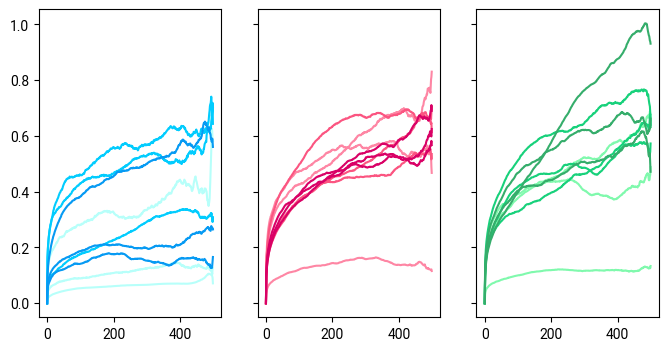

In [4]:
def select_layer(u,grid_size_x,grid_size_y,dz=10):
    u.trajectory[0]
    DMS = u.select_atoms("name DMS or name END")
    xmin, xmax = DMS.positions[:,0].min(), DMS.positions[:,0].max()
    ymin, ymax = DMS.positions[:,1].min(), DMS.positions[:,1].max()

    x_bins = np.linspace(xmin, xmax, grid_size_x + 1)
    y_bins = np.linspace(ymin, ymax, grid_size_y + 1)
    
    idx = []
    for i in range(len(x_bins)-1):
        for j in range(len(y_bins)-1):
            xi, xf = x_bins[i], x_bins[i+1]
            yi, yf = y_bins[j], y_bins[j+1]

            sel = u.select_atoms(f"(name DMS or name END) and (prop x > {xi} and prop x < {xf} and prop y > {yi} and prop y < {yf})")
            if len(sel) == 0:
                continue

            maxz = sel.positions[:,2].max()
            lower_limit = maxz - dz

            beads = sel.select_atoms(f"prop z > {lower_limit}")
            if len(beads) > 0:
                idx.extend(beads.indices)
            
    return np.array(idx)

import MDAnalysis.analysis.msd as msd

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SOLV = "water"
PULL = "equilibrated"
NREPS = ["K0","K2","K5"]
RUNS = ["run1","run2","run3"]
DENS = [0.1,0.2,0.3]
NFRAMES = 500
LOAD = True

fig,axes = plt.subplots(1,3, figsize=(8,4), sharey=True)

for ax,NREP in zip(axes,NREPS):


    out = []
    for DEN in DENS:
        print(NREP, DEN)

        MSDs = []
        for RUN in RUNS:

            if not LOAD:
                gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]
                traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]

                MySys = Grafting.NewSystem(gro=gro, traj=traj)

                u = MySys.universe
                idx = select_layer(u,50,10,10)

                toplayer = u.atoms[idx]
                print(len(toplayer))

                start = len(u.trajectory)-NFRAMES
                MSD = msd.EinsteinMSD(toplayer, msd_type='xyz', fft=True)
                MSD.run(start=start, verbose=False)
                
                av_MSD = MSD.results.timeseries
                            
                dfout = pd.DataFrame(av_MSD*.01)
                dfout.to_csv(f"{ROOT}/out_files/MSD/MSD_{NREP}_{DEN}_{RUN}.csv", index=False)
            else:
                av_MSD = pd.read_csv(f"{ROOT}/out_files/MSD/MSD_{NREP}_{DEN}_{RUN}.csv").values

            ax.plot(av_MSD*.01, color=COLOR_GRADIENT[f"{NREP},{DEN}"])


ax.legend(frameon=False)       



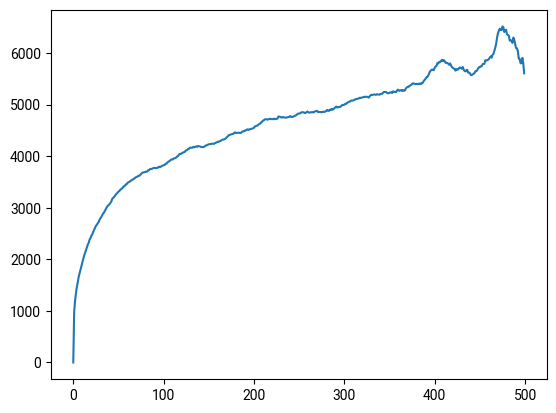

In [54]:
byptc = MSD.results.msds_by_particle
timeseries = MSD.results.timeseries

plt.plot(np.mean(byptc, axis=1), ls="solid")



In [ ]:
df = dfout[["dens","msd"]].astype(float)
df.plot(x="dens",y="msd", ls="none", marker="s")

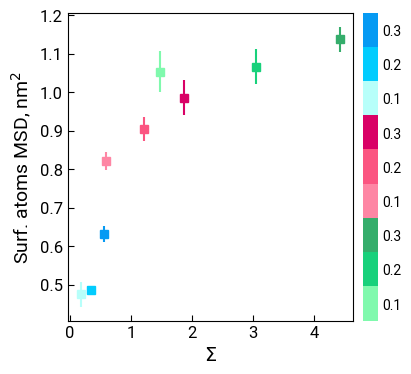

In [21]:

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SOLV = "water"
PULL = "equilibrated"
NREPS = ["K0","K2","K5"]
SAMPLES = ["P1", "P2", "P3"]
DENS = [0.1,0.2,0.3]

colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS [::-1] for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig,ax = plt.subplots(figsize=(4,4))
for NREP in NREPS:
    sigs = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    MSD = pd.read_csv(f"{ROOT}/out_files/MSD/MSD_{NREP}.csv")
    
    df = MSD.merge(sigs, on="dens")
    groups = df.groupby("dens")

    for den,group in groups:
        mean = group[["dens","sigma","msd"]].mean()["msd"]*.01
        sigma = group[["dens","sigma","msd"]].mean()["sigma"]
        std = group[["dens","sigma","msd"]].std()["msd"]*.01

        ax.errorbar(sigma, mean, std, color=COLOR_GRADIENT[f"{NREP},{den}"], marker="s", ls="none")


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

stylize_plot(ax,"$\\Sigma$","Surf. atoms MSD, nm$^2$", hide=None)

# SASA

In [ ]:
def calc_SASA(SOLV, NREPS, DENS, RUNS, AREA_BARE, FILENAME, folder="", append=False, load=False):

    if append:
        SASAs = append
    else:
        SASAs = {}

    for NREP in NREPS:
        SASAs[NREP] = []

        if not load:

            out = []
            for DEN in DENS:
                areas = []
                areas_norm = []

                for RUN in RUNS:
                    df = pd.read_csv(f"{ROOT}/{folder}/{SOLV}/{NREP}/{DEN}/{RUN}/{FILENAME}.xvg", skiprows=25, header=None, sep='\\s+', names=["time","tot","area"]).dropna()
                    print(df)

                    #df.to_csv(f"{ROOT}/out_files/roughness/SASA_{NREP},{DEN},{RUN},{SOLV}.dat", index=False)
                    areas_norm.append(df["area"].mean()/(AREA_BARE))
                    areas.append(df["area"].mean())
                    out.append([DEN, df["area"].mean()/(AREA_BARE), df["area"].std()/(AREA_BARE), df["area"].mean(), df["area"].std(), RUN])

            df = pd.DataFrame(out, columns=["dens","area_norm","std_area_norm","area","std_area","run"])
            df.to_csv(f"{ROOT}/out_files/roughness/{FILENAME}_{NREP}_{SOLV}.csv", index=False)
        else:
            df = pd.read_csv(f"{ROOT}/out_files/roughness/{FILENAME}_{NREP}_{SOLV}.csv")
        SASAs[NREP] = df
    return SASAs

def make_plot(ax, NREPS, SASA_sub, SASA_PDMS, markers=['s','o'], markers_edges=['white','white'], markers_sizes=[7,7]):
    for NREP in NREPS:

        df = SASA_sub[NREP]
        df = df[['dens','area_norm']].groupby('dens')

        ax.plot(df.mean().index, df['area_norm'].mean(), lw=2, color=COLOR_NREP[f'{NREP}'], ls="-",alpha=0.7)
        ax.errorbar(df.mean().index, df['area_norm'].mean(),  df['area_norm'].std(), label=NREP.replace("K0","P1").replace("K2","P2").replace("K5","P3").replace("50","M50").replace("100","M100"), lw=2, color=COLOR_NREP[f"{NREP}"], ls="none", marker=markers[0], ms=7, mec=markers_edges[0], mfc=COLOR_NREP[f"{NREP}"])

        df = SASA_PDMS[NREP]
        df = df[['dens','area_norm']].groupby('dens')

        twax.plot(df.mean().index, df['area_norm'].mean(), lw=2, color=COLOR_NREP[f'{NREP}'], ls="--",alpha=0.3)
        twax.errorbar(df.mean().index, df['area_norm'].mean(),  df['area_norm'].std(), label=NREP.replace("K0","P1").replace("K2","P2").replace("K5","P3").replace("50","M50").replace("100","M100"), lw=2, color=COLOR_NREP[f"{NREP}"], ls="none", marker=markers[1], ms=7, mec=markers_edges[1], mfc=COLOR_NREP[f"{NREP}"])

fig,ax = plt.subplots(figsize=(4,4))
twax = ax.twinx()

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"

bare_small = natsorted(glob(f"{ROOT}/SASA_new/water/K5/0.3/run1/connoly_SASA_sub.pdb"))[-1]
u = mda.Universe(bare_small)
AREA_BARE_SMALL = u.dimensions[0]*u.dimensions[1]*0.01
bare_big = natsorted(glob(f"{ROOT}/SASA_new/vacuum/K5/0.3/run4/connoly_SASA_sub.pdb"))[-1]
u = mda.Universe(bare_big)
AREA_BARE_BIG = u.dimensions[0]*u.dimensions[1]*0.01

# ----- 50x10 -----#
SOLV = "water"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
RUNS = ["run1","run2","run3"]

SASA_sub = calc_SASA(SOLV, NREPS, DENS, RUNS, AREA_BARE_SMALL, "SASA_sub", folder="SASA_new", load=True)
SASA_PDMS = calc_SASA(SOLV, NREPS, DENS, RUNS, AREA_BARE_SMALL, f"SASA_DMS_bigprobe", folder="SASA_new", load=True)
#make_plot(ax, NREPS, SASA_sub, SASA_PDMS)

# ----- 80x80 -----#
SOLV = "vacuum"
NREPS = ["K0","K2","K5"]
DENS = [0.3]
RUNS = ["run4"]

SASA_sub = calc_SASA(SOLV, NREPS, DENS, RUNS, AREA_BARE_BIG, "SASA_sub", folder="SASA_new", load=True)
SASA_PDMS = calc_SASA(SOLV, NREPS, DENS, RUNS, AREA_BARE_BIG, f"SASA_DMS_bigprobe", folder="SASA_new", load=True)
make_plot(ax, NREPS, SASA_sub, SASA_PDMS, ["s","o"], ["black","black"], [10,10])

#print(SASA_PDMS)


#--- plot style -----#
stylize_plot(twax,"", "$A_{PDMS} \\ / \\ A$")
stylize_plot(ax,"$\\sigma$ (gps/nm$^2$)", "$A_{sub} \\ / \\ A$", hide=False, ticks={"left":False, "right":True, "top":False, "bottom":False})

handles = [Line2D([0], [0], color=COLOR_NREP[NREP], lw=5, ls="-") for NREP in NREPS]
labels = [NREP.replace("K0","P1").replace("K2","P2").replace("K5","P3").replace("50","M50").replace("100","M100") for NREP in NREPS]
twax.legend(handles, labels, frameon=False, ncol=1, columnspacing=1, handlelength=0.3, fontsize=12, loc="center right")
handles = [Line2D([0], [0], color="gray", lw=2, ls="-", marker='o'), Line2D([0], [0], color="gray", lw=2, ls="--", marker='v')]
labels = ["Sub.", "PDMS"]
ax.legend(handles, labels, frameon=False, ncol=1, columnspacing=1, handlelength=2.5, fontsize=12, loc="upper right")
ax.set_zorder(1)
ax.patch.set_visible(False)
twax.set_zorder(0)

fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/SASA_{SOLV}_sub_and_PDMS.svg", dpi=350, bbox_inches="tight")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/roughness/SASA_{SOLV}_sub_and_PDMS.png", dpi=350, bbox_inches="tight")


/gpfs/scratch/ehpc13/Fabio/.venv/lib64/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


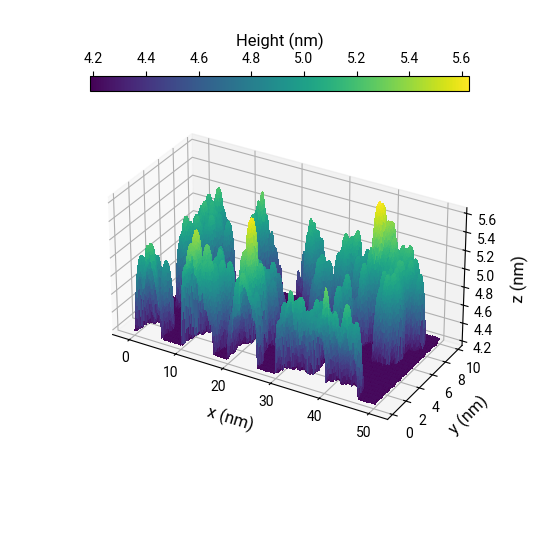

In [50]:
#Plot Connoly Surface

from mpl_toolkits.mplot3d import Axes3D
from MDAnalysis.transformations import wrap
from scipy.interpolate import griddata

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0"]
DENS = [0.1]
RUNS = ["run1"]
SOLV = "water"
PULL = "/equilibrated"
sizebead = ""

for NREP in NREPS:
    for DEN in DENS:
        for RUN in RUNS:
            try:
                gro = natsorted(glob(f"{ROOT}/SASA_new/{SOLV}/{NREP}/{DEN}/{RUN}/connoly_SASA_sub.pdb"))[-1]
            except Exception as err:
                print(err)
                continue
            
            u = mda.Universe(gro, bonds=None)

            selection = u.select_atoms("name DOT and prop z > 0")
        
            transform = wrap(selection)
            u.trajectory.add_transformations(transform)
            u.trajectory[-1]
            
            p = selection.positions*.1
            x, y, z = p[:,0], p[:,1], p[:,2]

            fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": "3d"})

            xi = np.linspace(x.min(), x.max(), 500)
            yi = np.linspace(y.min(), y.max(), 500)
            xi, yi = np.meshgrid(xi, yi)
            zi = griddata((x, y), z, (xi, yi), method='nearest')


            surf = ax.plot_surface(xi, yi, zi, cmap='viridis', rstride=1, cstride=1, linewidth=0, antialiased=False)
            #scatter = ax.scatter(p[:,0], p[:,1], p[:,2], c=p[:,2])

            colorbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=25, orientation="horizontal",
                        location="top", pad=-0.15)
            colorbar.set_label('Height (nm)')
            ax.set_xlabel('x (nm)')
            ax.set_ylabel('y (nm)')
            ax.set_zlabel('z (nm)')

            ax.xaxis.labelpad = 20
            ax.yaxis.labelpad = 10
            ax.zaxis.labelpad = 10
            ax.set_box_aspect(aspect=[2,1,1], zoom=0.7)

            fig.savefig(f"{ROOT}/plots/surfaces/{NREP}_{DEN}_{RUN}_connoly_surf.png", dpi=350, bbox_inches="tight")


# CAH

0.26047842213248834
0.4698998295542385
0.7086167174567352
0.7092055220777199
0.988129342938028
1.0278685897646112
0.9769094377424158
1.0777585396954317
1.073585786018289
[-0.50635837 -0.49502753  1.37274251]


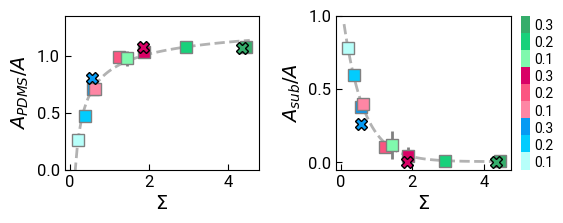

In [13]:
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

def load_data(ROOT, NREP, SOLV):    
    
    #bare_small = natsorted(glob(f"{ROOT}/SASA_new/water/K5/0.3/run1/connoly_SASA_sub.pdb"))[-1]
    #u = mda.Universe(bare_small)
    #A = u.dimensions[0]*u.dimensions[1]*0.01
    A = 496.1170703125
    AREAS_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_sub_{NREP}_{SOLV}.csv") 
    AREAS_pdms = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_bigprobe_{NREP}_{SOLV}.csv")
    AREAS_pdms = AREAS_pdms.rename(columns={"area":"area_PDMS"})
    AREAS_sub = AREAS_sub.rename(columns={"area":"area_sub"})
    AREAS = AREAS_sub.merge(AREAS_pdms, on=["dens","run"])
    AREAS.loc[:,['area_sub','area_PDMS']] = AREAS.loc[:,['area_sub','area_PDMS']]/A

    #bare_big = natsorted(glob(f"{ROOT}/SASA_new/vacuum/K5/0.3/run4/connoly_SASA_sub.pdb"))[-1]
    #u = mda.Universe(bare_big)
    #A_BIG = u.dimensions[0]*u.dimensions[1]*0.01
    A_BIG = 6399.170625
    AREAS_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_sub_{NREP}_vacuum.csv") 
    AREAS_pdms = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_bigprobe_{NREP}_vacuum.csv")
    AREAS_pdms = AREAS_pdms.rename(columns={"area":"area_PDMS"})
    AREAS_sub = AREAS_sub.rename(columns={"area":"area_sub"})
    AREAS_BIG = AREAS_sub.merge(AREAS_pdms, on=["dens","run"])
    AREAS_BIG.loc[:,['area_sub','area_PDMS']] = AREAS_BIG.loc[:,['area_sub','area_PDMS']]/A_BIG

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    SIG_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    df = SIG.merge(AREAS, on=["dens","run"])
    df_big = SIG_BIG.merge(AREAS_BIG, on=["dens","run"])
   
    return df, df_big


def load_data_MC(ROOT, NREP, SOLV):
    A_BIG = 6146.559999998039
    A = 405.7200000000056
    AREAS = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    AREAS.loc[:,['area_sub','area_PDMS']] = AREAS.loc[:,['area_sub','area_PDMS']]/A

    AREAS_BIG = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_{NREP}.csv")
    AREAS_BIG.loc[:,['area_sub','area_PDMS']] = AREAS_BIG.loc[:,['area_sub','area_PDMS']]/A_BIG

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    SIG_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    df = SIG.merge(AREAS, on=["dens","run"])
    df_big = SIG_BIG.merge(AREAS_BIG, on=["dens","run"])
  
    return df, df_big

SAMPLES = ["P1","P2","P3"]
SAMPLE = {"K0":"P1","K2":"P2","K5":"P3"}
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
SOLV = "water"


def power_law_func(x, a, b, c):
    return a * np.power(x, b) + c

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0", "K2", "K5"]
DENS = [0.1, 0.2, 0.3]
RUNS = ["run1", "run2", "run3"]
SAMPLES = {'K0':'P1', 'K2':'P2', 'K5':'P3'}

# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig,ax = plt.subplots(1,2,figsize=(6,2))
A_BIG = 6146.559999998039
A = 405.7200000000056

data_sub = []
data_pdms = []

for NREP in NREPS:
    
    df, df_big = load_data_MC(ROOT, NREP, SOLV)

    grouped = df.groupby("dens")
    grouped_big = df_big.groupby("dens")

    for DEN,group in grouped:
        
        ax[0].errorbar(group["sigma"].mean(), group["area_PDMS"].mean(), yerr=group["area_PDMS"].std(), lw=2, ls="none", marker='s', mec="gray", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=8, zorder=0)
        
        ax[1].errorbar(group["sigma"].mean(), group["area_sub"].mean(), yerr=group["area_sub"].std(), lw=2, ls="none", marker='s', mec="gray", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=8, zorder=0)

        print(group["area_PDMS"].mean())
        data_sub.append([group["sigma"].mean(), group["area_sub"].mean()])
        data_pdms.append([group["sigma"].mean(), group["area_PDMS"].mean()])

    for DEN,group in grouped_big:
        ax[0].errorbar(group["sigma"].mean(), group["area_PDMS"].mean(), yerr=group["area_PDMS"].std(), lw=2, ls="none", marker='X', mec="black", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=8, zorder=1)
        
        ax[1].errorbar(group["sigma"].mean(), group["area_sub"].mean(), yerr=group["area_sub"].std(), lw=2, ls="none", marker='X', mec="black", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=8, zorder=1)



data_pdms = np.array(data_pdms)
popt_log, pcov_log = curve_fit(power_law_func, data_pdms[:,0], data_pdms[:,1], p0=[1,-1,1])
a_log, b_log, c_log = popt_log

print(popt_log)
x_pdms = np.linspace(data_pdms[:,0].min()-0.1,data_pdms[:,0].max()+0.1,100)
ax[0].plot(x_pdms, power_law_func(x_pdms, *popt_log), c="k", ls="dashed", alpha=0.3, lw=2, zorder=-1)

data_sub = np.array(data_sub)
popt_exp, pcov_exp = curve_fit(exp_func, data_sub[:,0], data_sub[:,1])
a_exp, b_exp, c_exp = popt_exp
x_sub = np.linspace(data_sub[:,0].min()-0.1,data_sub[:,0].max()+0.1,100)
ax[1].plot(x_sub, exp_func(x_sub, *popt_exp), c="k", ls="dashed", alpha=0.3, lw=2, zorder=-1)
stylize_plot(ax[0],"$\\Sigma$","$A_{PDMS}/A$", hide=False)
stylize_plot(ax[1],"$\\Sigma$","$A_{sub}/A$", hide=False)

ax[0].set_ylim(0,1.35)
ax[1].set_ylim(-0.05,1.0)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax=ax[1], cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

fig.subplots_adjust(wspace=0.4)
fig.savefig(f"{ROOT}/plots/surfaces/SASA.png", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/surfaces/SASA.svg", dpi=400, bbox_inches="tight")


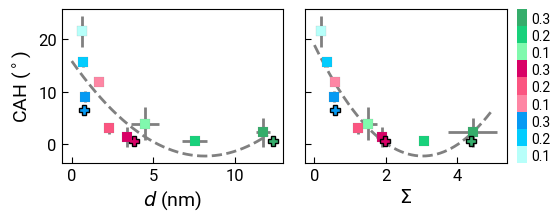

In [33]:
def load_data(ROOT, NREP, SOLV):    
    
    #bare_small = natsorted(glob(f"{ROOT}/SASA_new/water/K5/0.3/run1/connoly_SASA_sub.pdb"))[-1]
    #u = mda.Universe(bare_small)
    #A = u.dimensions[0]*u.dimensions[1]*0.01
    A = 496.1170703125

    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    AREAS_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_sub_{NREP}_{SOLV}.csv") 
    AREAS_pdms = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_bigprobe_{NREP}_{SOLV}.csv")
    AREAS_pdms = AREAS_pdms.rename(columns={"area":"area_PDMS"})
    AREAS_sub = AREAS_sub.rename(columns={"area":"area_sub"})
    AREAS = AREAS_sub.merge(AREAS_pdms, on=["dens","run"])
    PROJ = (A - AREAS['area_sub'])/A
    AREAS.loc[:,['area_sub','area_PDMS']] = AREAS.loc[:,['area_sub','area_PDMS']]

    #bare_big = natsorted(glob(f"{ROOT}/SASA_new/vacuum/K5/0.3/run4/connoly_SASA_sub.pdb"))[-1]
    #u = mda.Universe(bare_big)
    #A_BIG = u.dimensions[0]*u.dimensions[1]*0.01
    A_BIG = 6399.170625

    THICK_BIG = pd.read_csv(f"{ROOT}/out_files/thickness/big_mean_thickness_{NREP}_vacuum.csv")
    AREAS_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_sub_{NREP}_vacuum.csv") 
    AREAS_pdms = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_bigprobe_{NREP}_vacuum.csv")
    AREAS_pdms = AREAS_pdms.rename(columns={"area":"area_PDMS"})
    AREAS_sub = AREAS_sub.rename(columns={"area":"area_sub"})
    AREAS_BIG = AREAS_sub.merge(AREAS_pdms, on=["dens","run"])
    PROJ_BIG = (A_BIG - AREAS_BIG['area_sub'])/A_BIG
    AREAS_BIG.loc[:,['area_sub','area_PDMS']] = AREAS_BIG.loc[:,['area_sub','area_PDMS']]

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    SIG_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough_big = SIG_BIG.merge(THICK_BIG, on=["dens","run"])
    df_rough["Rscore"] = 1/2 * AREAS["area_sub"]/A * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS["area_PDMS"]/A - PROJ) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    df_rough_big["Rscore"] = 1/2 * AREAS_BIG["area_sub"]/A_BIG * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS_BIG["area_PDMS"]/A_BIG - PROJ_BIG) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    
    return df_rough, df_rough_big

def load_data_MC(ROOT, NREP, SOLV):
    df_A = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_K5.csv")
    A = df_A[df_A["run"]=="run1"]["base_area"].max()
    df_AB = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_K5.csv")
    A_BIG = df_AB[df_AB["run"]=="run4"]["base_area"].max()
    
    AREAS = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    AREAS_BIG = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_{NREP}.csv")

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    SIG_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    THICK_BIG = pd.read_csv(f"{ROOT}/out_files/thickness/big_mean_thickness_{NREP}_vacuum.csv")

    PROJ = (A - AREAS['area_sub'])/A
    PROJ_BIG = (A_BIG - AREAS_BIG['area_sub'])/A_BIG

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough_big = SIG_BIG.merge(THICK_BIG, on=["dens","run"])
    df_rough["Rscore"] = 1/2 * AREAS["area_sub"]/A * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS["area_PDMS"]/A - PROJ) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    df_rough_big["Rscore"] = 1/2 * AREAS_BIG["area_sub"]/A_BIG * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS_BIG["area_PDMS"]/A_BIG - PROJ_BIG) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    
    return df_rough, df_rough_big

def load_data_mono(ROOT, NREP, SOLV):
    df_A = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_300.csv")
    A = df_A[df_A["run"]=="run1"]["base_area"].max()
    
    AREAS = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")

    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")

    PROJ = (A - AREAS['area_sub'])/A

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough["Rscore"] = 1/2 * AREAS["area_sub"]/A * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS["area_PDMS"]/A - PROJ) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    
    return df_rough

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

SAMPLES = ["P1","P2","P3"]
SAMPLE = {"K0":"P1","K2":"P2","K5":"P3"}
NREPS = ["K0","K2","K5"]
NREPS_MONO =[50,100,300]
DENS = [0.1,0.2,0.3]

# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
ROOT_MONO = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"

RUNS = ["run1","run2","run3"]
SOLV = "water"
CAs = {"Bare":31, "PDMS":105, "std_BARE":1, "std_PDMS":2}

fig,axes= plt.subplots(1,2, figsize=(6,2), sharey=True)

dfs = []
for NREP,NREP_MONO in zip(NREPS,NREPS_MONO):
    cah, cah_std, sigmas, thicks, densities = [], [], [], [], []

    df_rough, df_rough_big = load_data_MC(ROOT, NREP, SOLV)
    df_mono = load_data_mono(ROOT_MONO, NREP_MONO, SOLV)
    out, out_big = [], []

    for DEN in DENS:

        dfp_big = df_rough_big[df_rough_big["dens"]==DEN]
        if not dfp_big.empty:
            vals = dfp_big.loc[:,["thickness","sigma","Rscore"]].to_numpy()
            d, sigma, cah = vals[:,0]*0.1,  vals[:,1], vals[:,2]*180/np.pi
            axes[0].errorbar(d, cah, lw=2, ls="none", marker='P', mew=1, mec="k", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
            axes[1].errorbar(sigma, cah, lw=2, ls="none", marker='P', mew=1, mec="k", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=3)
            out_big.append([DEN,*d, *sigma, *cah])

        dfp = df_rough[df_rough["dens"]==DEN]
        
        if not dfp.empty:
            grouped = dfp[["dens","thickness","sigma","Rscore"]].groupby("dens")
            means = grouped.mean()
            stds = grouped.std()

            mean_vals = means.loc[:,["thickness","sigma","Rscore"]].to_numpy()
            std_vals = stds.loc[:,["thickness","sigma","Rscore"]].to_numpy()
            d, sigma, cah = mean_vals[:,0]*0.1,  mean_vals[:,1], mean_vals[:,2]*180/np.pi
            d_err, sigma_err, cah_err = std_vals[:,0]*0.1, std_vals[:,1], std_vals[:,2]*180/np.pi

            axes[0].errorbar(d, cah, yerr=cah_err, xerr=d_err, lw=2, ls="none", marker='s', mew=0.1, mec="gray", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
            axes[1].errorbar(sigma, cah, yerr=cah_err, xerr=sigma_err, lw=2, ls="none", marker='s', mew=0.1, mec="gray", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
            out.append([DEN,*d,*d_err,*sigma,*sigma_err,*cah,*cah_err])

        '''
        dfp_mono = df_mono[df_mono["dens"]==DEN]
        axes[0].errorbar(dfp_mono["thickness"]*0.1,  dfp_mono["Rscore"]*180/np.pi, lw=2, ls="none", marker='X', mew=0.1, mec="k", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
        axes[1].errorbar(dfp_mono["sigma"],  dfp_mono["Rscore"]*180/np.pi, lw=2, ls="none", marker='X', mew=0.1, mec="k", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
        '''
        #print(NREP, DEN, dfp_mono["thickness"].values*0.1,  dfp_mono["Rscore"].values*180/np.pi)
        #print(NREP, DEN, dfmean["sigma"].mean().values,  dfmean["Rscore"].mean().values*180/np.pi, dfmean["Rscore"].std().values*180/np.pi)

    out = np.array(out)
    out_big = np.array(out_big)
    dfout = pd.DataFrame(out, columns = ["dens","d","d_err","sigma","sigma_err","cah","cah_err"])
    dfout.to_csv(f"{ROOT}/out_files/CAH/CAH_{NREP}.csv", index=False)

    dfoutbig = pd.DataFrame(out_big, columns = ["dens","d","sigma","cah"])
    dfoutbig.to_csv(f"{ROOT}/out_files/CAH/big_CAH_{NREP}.csv", index=False)

    dfs.append(pd.concat([dfout.loc[:,["dens","d","sigma","cah"]],dfoutbig]))

df_all = pd.concat(dfs)
# Fit the polynomial to the data thickness
variables = df_all["d"].values
rscores = df_all["cah"].values
coefficients = np.polyfit(variables, rscores, 2)

# Generate points for plotting the fitted curve
x_fit = np.linspace(0, 12, 500)
y_fit = np.polyval(coefficients, x_fit)
axes[0].plot(x_fit, y_fit, ls="--", color="gray", lw=2, zorder=-1)

stylize_plot(axes[0],f"$d$ (nm)",r"CAH ($^\circ$)", hide=False)

# Fit the polynomial to the data sigma
variables = df_all["sigma"].values
coefficients = np.polyfit(variables, rscores, 2)

# Generate points for plotting the fitted curve
x_fit = np.linspace(0, 5, 500)
y_fit = np.polyval(coefficients, x_fit)
axes[1].plot(x_fit, y_fit, ls="--", color="gray", lw=2, zorder=-1)

stylize_plot(axes[1],"$\\Sigma$",r"", hide=False)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax=axes[1], cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

fig.subplots_adjust(wspace=0.1)

fig.savefig(f"{ROOT}/plots/CAH.svg", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/CAH.png", dpi=400, bbox_inches="tight")

,h,run,Asub,Asurf,z
0,2,run1,0.0,1.001064828516921,1.7637568644875905
1,2,run2,0.0,1.001149730656734,1.7688432779492993
2,2,run3,0.0,1.0008884282720434,1.7706210466552896
3,5,run1,0.0,1.0065984347369343,4.403414046465834
4,5,run2,0.0,1.0052877477122697,4.418868473990794
5,5,run3,0.0,1.0103891926173203,4.434303477369766
6,10,run1,0.0,1.0223113855092654,8.836695633359488
7,10,run2,0.0,1.022109461205231,8.83287501482901
8,10,run3,0.0,1.019746891773858,8.822915505768645
9,15,run1,0.0,1.0720420581338932,13.224824504034821


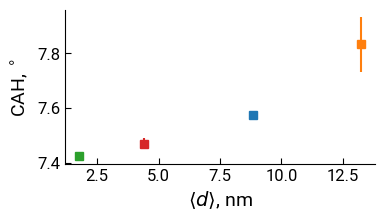

In [90]:

def compute_cah_error(Asub, Asurf, CAs, CA, sigma_Asub, sigma_Asurf):
    # Constants
    CA_rad = np.deg2rad(CA)
    cos_CAs = np.cos(np.deg2rad(CAs))
    deg_to_rad = np.pi / 180
    rad_to_deg = 180 / np.pi
    
    component_1 = np.abs(CA_rad - cos_CAs)
    component_2 = np.abs(np.cos(CA_rad)) * rad_to_deg
    
    dCAH_dAsub = 0.5 * component_1
    dCAH_dAsurf = 0.5 * component_2
    
    sigma_CAH = np.sqrt((dCAH_dAsub * sigma_Asub) ** 2 + (dCAH_dAsurf * sigma_Asurf) ** 2)
    
    return sigma_CAH

fig, ax = plt.subplots(figsize=(4,2))

CA = 105
df = pd.DataFrame(np.array(data), columns=["h","run","Asub","Asurf","z"])
display(df)
group = df.groupby("h")

for i,g in group:
    d = g["z"].astype(float).mean()
    Asurf = g["Asurf"].astype(float).mean()
    Asub = g["Asub"].astype(float).mean()
    Asurf_err = g["Asurf"].astype(float).std()
    Asub_err = g["Asub"].astype(float).std()

    CAH = 1/2 * Asub * np.abs( (CA* np.pi/180) - np.cos(30* np.pi/180))  +  1/2 * (Asurf) * np.abs((np.cos(CA* np.pi/180)))*180/np.pi
    CAH_err = compute_cah_error(Asub, Asurf, 30, CA, Asub_err, Asurf_err)
    ax.errorbar(d, CAH, CAH_err, marker="s")

stylize_plot(ax,"$\\langle d \\rangle$, nm", "CAH, $^\circ$")


# MD + Experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe
from Experiments import ImageFuncs

def params_adh(size):
    return {'interpolation':'bessel', 'extent':[0, size, 0, size], 'aspect':1,
                   'vmin':-1, 'vmax':5}

def params_jumpin(size):
    return {'interpolation':'bessel', 'extent':[0, size, 0, size], 'aspect':1,
                   'vmin':-1, 'vmax':1}

scan_unit = 'nm'
scalebar_settings = {500:{'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                        'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':500/30, 'fontproperties':{'size':10, 'weight':'bold'}},
                    1000:{'size':200, 'label':f'200 {scan_unit}', 'loc':'lower right', 
                        'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':1000/30, 'fontproperties':{'size':10, 'weight':'bold'}},
                    'MD':{'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                         'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':80/30, 'fontproperties':{'size':10, 'weight':'bold'}},
                    'zoom': {'size':20, 'label':f'20 {scan_unit}', 'loc':'lower right', 
                         'pad':0.3, 'color':'white', 'frameon':False, 'size_vertical':200/30, 'fontproperties':{'size':8, 'weight':'bold'}}}

jump_in_dict = {1000:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_1000nm_spot3.003/jump_in.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_1000nm_spot3.005/jump_in.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_1000nm_spot3.004/jump_in.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_1000nm_spot3.006/jump_in.npy')},
                500:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_500nm_spot1.001//jump_in.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_500nm_spot1.001//jump_in.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_500nm_spot2.003//jump_in.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_500nm_spot2.004//jump_in.npy')}}

adh_dict = {1000:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_1000nm_spot3.003/retracts_adhesion.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_1000nm_spot3.005/retracts_adhesion.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_1000nm_spot3.004/retracts_adhesion.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_1000nm_spot3.006/retracts_adhesion.npy')},
            500:{'K5':np.load(f'Experiments/PDMS_140323_Krumpfer_10kcSt_500nm_spot1.001//retracts_adhesion.npy'),
                    'K4':np.load(f'Experiments/PDMS_140323_Krumpfer_350cSt_500nm_spot1.001//retracts_adhesion.npy'),
                    'K2':np.load(f'Experiments/PDMS_140323_Krumpfer_50cSt_500nm_spot2.003//retracts_adhesion.npy'),
                    'K0':np.load(f'Experiments/PDMS_140323_Krumpfer_20cSt_500nm_spot2.004//retracts_adhesion.npy')}}


from MDAnalysis.transformations import wrap
import cmasher as cmr

def hist2D(root,nrep,den,run,solv,mol,nframes):

    print(f"{root}/{nrep}/{den}/{run}/{solv}")
    gro = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.gro"))[-1]
    traj = natsorted(glob(f"{root}/{nrep}/{den}/{run}/{solv}/nvt/*part*.xtc"))[-1]

    sample = Grafting.NewSystem(gro=gro, traj=traj)
    u = sample.universe
    transform = wrap(u.atoms)
    u.trajectory.add_transformations(transform)
    u.trajectory[-1]
    DMS = u.select_atoms(f"name {mol}", updating=True)

    positions = []
    for ts in u.trajectory[-nframes:]:
        positions.extend(DMS.positions)

    positions = np.array(positions)
    hist, xedges, yedges = get_hist2D(positions)
    df = pd.DataFrame(hist)
    df.to_csv(f"{root}/out_files/density_profiles/height_{nrep}_{den}_{run}.csv", index=False)

    return hist, xedges, yedges

def get_hist2D(positions):
    x,y,z = positions[:,0]*.1, positions[:,1]*.1, positions[:,2]*.1
    #x,y,z = np.append(x,x), np.append(y,y+10), np.append(z,z)
    #av_z = np.mean(z)

    num_bins_y = 150
    num_bins_x = 150

    # Create 2D histogram of the data
    H, xedges, yedges = np.histogram2d(x, y, bins=(num_bins_x, num_bins_y), weights=z)
    max_indices = np.unravel_index(np.argmax(H, axis=None), H.shape)
    H_max = np.zeros((num_bins_x, num_bins_y))

    # Assign the maximum z value to the corresponding bin
    for i in range(num_bins_x):
        for j in range(num_bins_y):
            z_values_in_bin = z[(x >= xedges[i]) & (x < xedges[i+1]) & (y >= yedges[j]) & (y < yedges[j+1])]
            if len(z_values_in_bin) > 0:
                H_max[i, j] = np.max(z_values_in_bin)

    #fig1, ax1 = plt.subplots()
    #sns.kdeplot(H_max.T.flatten(), fill=True, legend=False, ax=ax1)

    return H_max.T, xedges, yedges

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_single_image(fig, ax, data, bounds=None, rel_bounds=False, top_right_text='', top_left_text='', cbar_label=False, ar=1, print_median_value=False, scale_bar_size=None, imparams={}, scalebar_settings={}, spines=False, cbar=True, cmap='viridis'):

    av_height = np.median(data)
    if bounds:
        if rel_bounds:
            imparams['vmin']  = bounds[0] + av_height
            imparams['vmax']  = bounds[1] + av_height
        else:
            imparams['vmin']  = bounds[0]
            imparams['vmax']  = bounds[1]


    im=ax.imshow(data, cmap=cmap, **imparams)
    scalebar = AnchoredSizeBar(ax.transData, **scalebar_settings)
    ax.add_artist(scalebar)

    if not spines:
        ax.set_axis_off()
    
    ax.text(s=top_left_text,x=0,y=1.01, transform=ax.transAxes, va='bottom', size=7)
    ax.text(s=top_right_text,x=1,y=1.01, transform=ax.transAxes, va='bottom', ha='right', size=7)

    if print_median_value:
        ax.text(s=f"median value: {np.round(av_height,2)}",x=1,y=0.99, transform=ax.transAxes, va='top', ha='right', size=7,
               color='white')
    
    if cbar:
        make_colorbar(fig, ax, im, label=cbar_label)


def make_colorbar(fig, ax, img, where='top', label=False):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes(where, size='5%', pad=0.03)
    cbar = fig.colorbar(img, cax=cax, orientation='horizontal', location='top')

    if label:
        cbar.ax.set_xlabel(label, size=8)
    cbar.ax.tick_params(which='both', size=1, labelsize=8, pad=0.1)
    cbar.outline.set_edgecolor('none')

    return cax, cbar
    

sys_dict = {"root":"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse", "nrep":"", "den":0.3, "run":"", "solv":"vacuum", "mol":"DMS", "nframes":20}
nreps = ["K0","K2","K5"]
runs = ["run4","run4","run4"]
LOAD = False
cmap = plt.get_cmap('cmr.torch') 

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,8), gridspec_kw={'width_ratios':[1,1,1], 'height_ratios':[1,1,1]})
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9, hspace=0.3, wspace=0.2)

silica_height = 3.015
axesMD = axes[:,0]
axesAFM = axes[:,1]
axesADH = axes[:,2]
samples = ['K5']
bounds = {'K0':[0.5,3], 'K2':[1,8], 'K5':[6,20]}
root = sys_dict["root"]

for sample,axMD,axAFM,axADH in zip(samples,axesMD,axesAFM,axesADH):

    if sample == 'K0':
        cbar_label_afm = 'Height (nm)'
        cbar_label_adh = 'Adhesion Force (nN)'
    else:
        cbar_label_afm = False
        cbar_label_adh = False

    if not LOAD:
        sys_dict['nrep'] = sample
        sys_dict['run'] = 'run4'
        print(sys_dict)
        hist, xedges, yedges = hist2D(**sys_dict)
    else:
        den = sys_dict["den"]
        hist = pd.read_csv(f"{root}/out_files/density_profiles/height_{sample}_{den}_run4.csv").to_numpy()
        hist = np.where(hist != 0, hist - silica_height, hist)

    # Plot the surface from above
    imMD = axMD.imshow(hist, extent=[0,80,0,80], origin='lower', aspect='equal', cmap=cmap, interpolation="gaussian", vmin=bounds[sample][0], vmax=bounds[sample][1])
    axMD.set_axis_off()
    scalebar = AnchoredSizeBar(axMD.transData, **scalebar_settings['MD'])
    axMD.add_artist(scalebar)
    make_colorbar(fig, axMD, imMD, where='top', label=cbar_label_afm)

    size_jumpin = 1000
    jump_in_img = ImageFuncs.flatten(jump_in_dict[size_jumpin][sample], retain_magnitude=True)
    imAFM = plot_single_image(fig=fig, ax=axAFM, data=jump_in_img, bounds=bounds[sample], rel_bounds=False, cbar_label=cbar_label_afm, imparams=params_jumpin(size_jumpin), scalebar_settings=scalebar_settings[size_jumpin], cmap=cmap)

    adh_img = ImageFuncs.flatten(adh_dict[1000][sample], retain_magnitude=True)
    imADH = plot_single_image(fig=fig, ax=axADH, data=adh_img, bounds=[-1,1], rel_bounds=True, cbar_label=cbar_label_adh, imparams=params_adh(1000), scalebar_settings=scalebar_settings[1000], cmap=cmap)

    # inset Axes....
    x1, x2, y1, y2 = 80, 260, 510, 690  # subregion of the original image
    axins = axAFM.inset_axes([-0.15, -0.15, 0.6, 0.6], xlim=(x1, x2), ylim=(y1, y2), xticks=[], yticks=[], xticklabels=[], yticklabels=[])
    plot_single_image(fig=fig, ax=axins, data=jump_in_img, bounds=bounds[sample], rel_bounds=False, imparams=params_jumpin(size_jumpin), scalebar_settings=scalebar_settings['zoom'], spines=True, cbar=False, cmap=cmap)
    axAFM.indicate_inset_zoom(axins, edgecolor="black")

    x1, x2, y1, y2 = 380, 560, 580, 760  # subregion of the original image
    axins = axADH.inset_axes([-0.15, -0.15, 0.6, 0.6], xlim=(x1, x2), ylim=(y1, y2), xticks=[], yticks=[], xticklabels=[], yticklabels=[])
    plot_single_image(fig=fig, ax=axins, data=adh_img, bounds=[-1,1], rel_bounds=True, scalebar_settings=scalebar_settings['zoom'], imparams=params_adh(1000), cmap=cmap, spines=True, cbar=False)
    axADH.indicate_inset_zoom(axins, edgecolor="black")

fig.savefig(f'{root}/plots/colormaps.svg', dpi=450)
fig.savefig(f'{root}/plots/colormaps.png', dpi=450)


# Surface

In [ ]:
from Silanizer.Grafter.grafter import Grafting
from MDAnalysis.transformations import wrap


def calc_mc(NREP, DEN, RUN, SOLV, PULL, mol, voxel_size=(1,1,1), traj=False, frames=False, level=0.5, out=None, sigma=1, maxlen=1, layers_to_ignore=1, add=""):
    gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]

    if not traj:
        iterative = [1] 
        MySys = Grafting.NewSystem(gro=gro)
    else:
        traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]
        MySys = Grafting.NewSystem(gro=gro, traj=traj)

        if frames < len(MySys.universe.trajectory):
            iterative = MySys.universe.trajectory[-frames:]
        else:
            iterative = MySys.universe.trajectory[0:]

    transform = wrap(MySys.universe.atoms)
    MySys.universe.trajectory.add_transformations(transform)
    MySys.universe.trajectory[-1]
    universe = MySys.universe

    # Calculate PDMS area:
    u = universe.select_atoms(f"name {mol}", updating=True)
    bulk = universe.select_atoms(f"name N1L or name N1L1")
    zsurf = bulk.positions[:,2].max()
    plot_projection_data(u.select_atoms("name DMS").positions, out=f"{ROOT}/plots/surfaces/{add}original_{NREP}_{DEN}_{RUN}.png")

    dfs = []
    for frame in iterative:
        t = frame.time
        df = pd.DataFrame({"id":u.atoms.ix, "x":u.atoms.positions[:,0], "y":u.atoms.positions[:,1], "z":u.atoms.positions[:,2], "t":t})
        df[["x","y","z"]] = df[["x","y","z"]]*.1
        df["z"] -= zsurf*.1

        dfs.append(df)     

    df_out = pd.concat(dfs)
    df_out.to_csv(f"{ROOT}/out_files/positions/positions_{NREP}_{DEN}_{RUN}.csv", index=False)

    print("voxel size is:", voxel_size)
    base_area, surface_area, projected_area, verts, faces = MySys.average_surface_area_and_visualize(df_out[["x","y","z"]].values, voxel_size=voxel_size, layers_to_ignore=layers_to_ignore, 
                                                                                                     level=level, out=out, sigma=sigma, maxlen=maxlen)

    rmsd = MySys.calculate_rmsd_from_avg_height(verts)
    
    return base_area, surface_area, projected_area, rmsd

def plot_projection_data(pos, out):
    fig, ax = plt.subplots()
    ax.scatter(pos[:,0], pos[:,1])
    ax.set_title("Raw data projection")
    ax.set_xlabel("x(nm)")
    ax.set_ylabel("y(nm)")
    ax.set_aspect('equal')
    fig.savefig(out, dpi=350, bbox_inches="tight")
    
   
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K2"]
DENS = [0.6,1.0]
RUNS = ["run1","run2","run3"]
SOLV = "water"
PULL = "equilibrated"

for NREP in NREPS:
    out = []
    for DEN in DENS:
        for RUN in RUNS:

            print(f"##########\nSystem: {NREP} {DEN} {RUN}")

            if RUN == "run4":
                add = "big_"
            else:
                add = ""

            base_area, surface_area, projected_area, rmsd = calc_mc(NREP, DEN, RUN, SOLV, PULL, mol="DMS", traj=True, frames=100, voxel_size=(0.5, 0.5, 0.2), 
                                                            level=0.8, out=f"{ROOT}/plots/surfaces/{add}{NREP}_{DEN}_{RUN}", sigma=0.8, maxlen=1.5, add=add)

            SASA = base_area - projected_area 
            SASA = np.sqrt(round(SASA, 1)**2)
            out.append([DEN, surface_area, SASA, projected_area, RUN, rmsd, base_area])

            #information
            print(f"Surface Area: {surface_area} nm²")
            print(f"Projection Area (xy plane): {projected_area} nm²")
            print(f"SASA: {SASA} nm²")
            print(f"RMSD: {rmsd} nm")
            print(f"Base: {base_area} nm²\n")

    #df = pd.DataFrame(np.array(out), columns=["dens","area_PDMS","area_sub","area_proj","run","rmsd","base_area"])
    #df.to_csv(f"{ROOT}/out_files/surface_area/{add}surface_area_{NREP}.csv", index=False)

In [ ]:
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0", "K2", "K5"]
DENS = [0.1, 0.2, 0.3, 0.6, 1.0]
RUNS = ["run1", "run2", "run3", "run4"]

#area_sub = 445.41984375638935
fig,ax = plt.subplots(1,2,figsize=(6,2))
area_sub = 6177.960000001627
area_sub1 = 405.7200000000115

for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    sigma = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_water_method2.csv")
    df = pd.merge(df, sigma, on=["dens","run"])

    df_big = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_{NREP}.csv")
    sigma_big = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")
    df_big = pd.merge(df_big, sigma_big, on=["dens","run"])
    
    for DEN in DENS:

        if DEN==0.3:
            df_big = df_big[df_big["dens"] == 0.3]
            ax[0].errorbar(df_big["sigma"], df_big["area_PDMS"]/area_sub, lw=2, ls="none", 
                        marker='X', mec="black", mfc=COLOR_NREP[f"{NREP}"], color=COLOR_NREP[f"{NREP}"], label=f"{NREP}, {DEN}", ms=7, zorder=2)
                
            ax[1].errorbar(df_big["sigma"], df_big["area_sub"]/area_sub, lw=2, ls="none", 
            marker='X', mec="black", mfc=COLOR_NREP[f"{NREP}"], color=COLOR_NREP[f"{NREP}"], label=f"{NREP}, {DEN}", ms=7, zorder=2)
    
        grouped = df.groupby("dens")
        ax[0].errorbar(grouped["sigma"].mean(), grouped["area_PDMS"].mean()/area_sub1, yerr=grouped["area_PDMS"].std()/area_sub1, lw=2, ls="none", 
                    marker='s', mec="white", mfc=COLOR_NREP[f"{NREP}"], color=COLOR_NREP[f"{NREP}"], label=f"{NREP}, {DEN}", ms=7, zorder=0)
        
        ax[1].errorbar(grouped["sigma"].mean(), grouped["area_sub"].mean()/area_sub1, yerr=grouped["area_sub"].std()/area_sub1, lw=2, ls="none", 
                    marker='s', mec="white", mfc=COLOR_NREP[f"{NREP}"], color=COLOR_NREP[f"{NREP}"], label=f"{NREP}, {DEN}", ms=7, zorder=0)

        

handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=COLOR_NREP[f"{NREP}"], markersize=6, label=f"{NREP}") for NREP in NREPS]
labels = [f"{NREP}" for NREP in NREPS]
ax[1].legend(handles=handles, labels=labels, frameon=False, fontsize=12, loc="upper right", framealpha=0.6, facecolor="white", 
          edgecolor="none", handlelength=0.1, columnspacing=1)
#ax.legend(frameon=False, fontsize=10, loc="upper left", framealpha=0.6, facecolor="white", edgecolor="none", handlelength=0.1, columnspacing=1)

stylize_plot(ax[0],"$\\Sigma$","$A_{PDMS}/A$")
stylize_plot(ax[1],"$\\Sigma$","$A_{sub}/A$")

fig.subplots_adjust(wspace=0.4)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

SAMPLES = ["P1","P2","P3"]
SAMPLE = {"K0":"P1","K2":"P2","K5":"P3"}
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6]

# Create a colormap from the colors
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
RUNS = ["run1","run2","run3"]
SOLV = "water"
CAs = {"Bare":75, "PDMS":105, "std_BARE":1, "std_PDMS":2}

fig,axes= plt.subplots(1,2, figsize=(5,2), sharey=True)

rscores, sigmas, thicks = [], [], []
A_floor_small = 408.2400000000115
A_floor_big = 6177.960000001627

for NREP in NREPS:
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    areas = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")

    THICK_big = pd.read_csv(f"{ROOT}/out_files/thickness/big_mean_thickness_{NREP}_vacuum.csv")
    areas_big = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_{NREP}.csv")
    SIG_big = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    df_rough = SIG.merge(THICK, on=["dens","run"])
    df_rough_big = SIG_big.merge(THICK_big, on=["dens","run"])

    print(df_rough_big)

    df_rough["Rscore"] = 1/2 * areas["area_sub"]/A_floor_small * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (areas["area_PDMS"]-areas["area_proj"])/A_floor_small * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    df_rough_big["Rscore"] = 1/2 * areas_big["area_sub"]/A_floor_big * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (areas_big["area_PDMS"]-areas_big["area_proj"])/A_floor_big * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))

    for DEN in DENS:

        dfp_big = df_rough_big[df_rough_big["dens"]==DEN]
        axes[0].errorbar(dfp_big["thickness"]*0.1,  dfp_big["Rscore"]*180/np.pi, lw=2, ls="none", marker='X', mec="k", 
            mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=2)
        axes[1].errorbar(dfp_big["sigma"],  dfp_big["Rscore"]*180/np.pi, lw=2, ls="none", marker='X', mec="k", 
            mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=2)

        dfp = df_rough[df_rough["dens"]==DEN]
        dfmean = dfp[["dens","thickness","sigma","Rscore"]].groupby("dens")

        axes[0].errorbar(dfp["thickness"]*0.1,  dfp["Rscore"]*180/np.pi, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
        axes[1].errorbar(dfp["sigma"],  dfp["Rscore"]*180/np.pi, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)

        #axes[0].errorbar(dfmean["thickness"].mean()*0.1,  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, 
        #    xerr=dfmean["thickness"].std()*0.1, lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)
        #axes[1].errorbar(dfmean["sigma"].mean(),  dfmean["Rscore"].mean()*180/np.pi, yerr=dfmean["Rscore"].std()*180/np.pi, 
        #    xerr=dfmean["sigma"].std(), lw=2, ls="none", marker='o', mec="white", mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color=COLOR_GRADIENT[f"{NREP},{DEN}"], label=f"{SAMPLE[NREP]}, {DEN}", ms=7, zorder=0)


        sigmas.extend(dfmean["sigma"].mean())
        thicks.extend(dfmean["thickness"].mean()*0.1)
        rscores.extend(dfmean["Rscore"].mean()*180/np.pi)  


# Fit the polynomial to the data thickness
variables = np.array(thicks)
rscores = np.array(rscores)
mask = variables < 9.5
coefficients = np.polyfit(variables[mask], rscores[mask], 2)

# Generate points for plotting the fitted curve
x_fit = np.linspace(-1, 9.5, 500)
y_fit = np.polyval(coefficients, x_fit)
#axins[0].plot(x_fit, y_fit, ls="--", color="black")

stylize_plot(axes[0],f"$d$ (nm)",r"CAH (degrees)", hide=False)

# Fit the polynomial to the data sigma
variables = np.array(sigmas)
rscores = np.array(rscores)
mask = variables < 4.5
coefficients = np.polyfit(variables[mask], rscores[mask], 2)

# Generate points for plotting the fitted curve
x_fit = np.linspace(-1, 5, 500)
y_fit = np.polyval(coefficients, x_fit)
#axins[1].plot(x_fit, y_fit, ls="--", color="black")

stylize_plot(axes[1],"$\\Sigma$",r"", hide=False)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax=axes[1], cax=cax, orientation='vertical', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_yticklabels(labels, ha='left')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

#axes[0].axvline(2.5, lw=0.8, color="black", alpha=0.75)
#axes[0].axvline(11.5, lw=0.8, color="black", alpha=0.75)
#axes[1].axvline(-0.5, lw=0.8, color="black", alpha=0.75)
#axes[1].axvline(2.5, lw=0.8, color="black", alpha=0.75)

fig.subplots_adjust(wspace=0.1)

fig.savefig(f"{ROOT}/plots/roughness/CAH_thick_bigSigma_{SOLV}.svg", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/roughness/CAH_thick_bigSigma_{SOLV}.png", dpi=400, bbox_inches="tight")

# Paper Figs

139.54680537270715
238.06001941857951
333.84563275567916
324.33838424966297
433.87885228827014
444.1024376114614
429.1492989435554
465.78812665909504
466.7956630532666


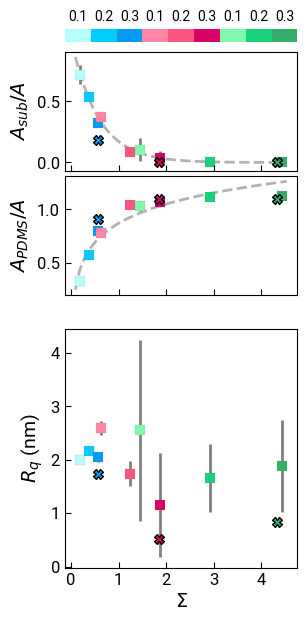

In [10]:
#Fig 1 / Pt.2

def load_data(ROOT, NREP, SOLV, AREA_BARE="small"):
    if AREA_BARE == "small":
        bare_small = natsorted(glob(f"{ROOT}/SASA_new/water/K5/0.3/run1/connoly_SASA_sub.pdb"))[-1]
        u = mda.Universe(bare_small)
        AREA_BARE = u.dimensions[0]*u.dimensions[1]*0.01
        THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
        ROUGHNESS = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLV}.csv")


    elif AREA_BARE == "big":
        bare_big = natsorted(glob(f"{ROOT}/SASA_new/vacuum/K5/0.3/run4/connoly_SASA_sub.pdb"))[-1]
        u = mda.Universe(bare_big)
        AREA_BARE = u.dimensions[0]*u.dimensions[1]*0.01
        THICK = pd.read_csv(f"{ROOT}/out_files/thickness/big_mean_thickness_{NREP}_{SOLV}.csv")
        ROUGHNESS = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLV}.csv")


    #areas = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    AREAS_sub = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_sub_{NREP}_{SOLV}.csv") 
    AREAS_pdms = pd.read_csv(f"{ROOT}/out_files/roughness/SASA_DMS_bigprobe_{NREP}_{SOLV}.csv")
    AREAS_pdms = AREAS_pdms.rename(columns={"area":"area_PDMS"})
    AREAS_sub = AREAS_sub.rename(columns={"area":"area_sub"})
    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")

    AREAS = AREAS_sub.merge(AREAS_pdms, on=["dens","run"])
    PROJ = (AREA_BARE - AREAS['area_sub'])/AREA_BARE
    AREAS.loc[:,['area_sub','area_PDMS']] = AREAS.loc[:,['area_sub','area_PDMS']]/AREA_BARE
    
    return AREAS, PROJ, THICK, SIG, ROUGHNESS

def load_data_MC(ROOT, NREP, SOLV, A, A_BIG):
    AREAS = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_{NREP}.csv")
    THICK = pd.read_csv(f"{ROOT}/out_files/thickness/mean_thickness_{NREP}_{SOLV}.csv")
    ROUGHNESS = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_{SOLV}.csv")
    #AREAS = AREAS.rename(columns={"rmsd":"Rq"})

    AREAS_BIG = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_{NREP}.csv")
    THICK_BIG = pd.read_csv(f"{ROOT}/out_files/thickness/big_mean_thickness_{NREP}_vacuum.csv")
    ROUGHNESS_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/Rq_{NREP}_vacuum.csv")
    #AREAS_BIG = AREAS_BIG.rename(columns={"rmsd":"Rq"})

    SIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_{SOLV}_method2.csv")
    SIG_BIG = pd.read_csv(f"{ROOT}/out_files/roughness/sigma_{NREP}_vacuum_method2.csv")

    df = SIG.merge(AREAS, on=["dens","run"])
    df_big = SIG_BIG.merge(AREAS_BIG, on=["dens","run"])

    df = df.merge(THICK, on=["dens","run"])
    df_big = df_big.merge(THICK_BIG, on=["dens","run"])

    df = df.merge(ROUGHNESS, on=["dens","run"])
    df_big = df_big.merge(ROUGHNESS_BIG, on=["dens","run"])

    PROJ = (A - AREAS['area_sub'])/A
    PROJ_BIG = (A_BIG - AREAS['area_sub'])/A_BIG

    df["Rscore"] = 1/2 * AREAS["area_sub"]/A * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS["area_PDMS"]/A-PROJ) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    df_big["Rscore"] = 1/2 * AREAS_BIG["area_sub"]/A_BIG * np.abs( (np.cos(CAs["PDMS"]* np.pi/180) - np.cos(CAs["Bare"]* np.pi/180)) ) + 1/2 * (AREAS_BIG["area_PDMS"]/A_BIG-PROJ_BIG) * np.abs((np.cos(CAs["PDMS"]* np.pi/180)))
    
    return df, df_big

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

def power_law_func(x, a, b, c):
    return a * np.power(x, b) + c

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
SOLV = "water"
SAMPLES = ["P1","P2","P3"]
SAMPLE = {"K0":"P1","K2":"P2","K5":"P3"}
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3]
CAs = {"Bare":75, "PDMS":105, "std_BARE":1, "std_PDMS":2}
df_A = pd.read_csv(f"{ROOT}/out_files/surface_area/surface_area_K5.csv")
A = df_A[df_A["run"]=="run1"]["base_area"].max()
df_AB = pd.read_csv(f"{ROOT}/out_files/surface_area/big_surface_area_K5.csv")
A_BIG = df_AB[df_AB["run"]=="run4"]["base_area"].max()

#Colorbar
colors = [COLOR_GRADIENT[f"{NREP},{DEN}"] for NREP in NREPS for DEN in DENS]
labels = [f"{DEN}" for SAMPLE in SAMPLES for DEN in DENS]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig,ax = plt.subplots(5,1, figsize=(3,7), sharex=True, gridspec_kw={'height_ratios':[0.15,1,1,0.2,2]})
ax[3].set_axis_off()

data_sub, data_pdms = [],[]
for NREP in NREPS:
    df, df_big = load_data_MC(ROOT, NREP, "water", A, A_BIG)

    df = df[df["dens"].isin(DENS)]
    grouped = df.groupby("dens")

    df_big = df_big[df_big["dens"].isin(DENS)]
    df_big = df_big[df_big["dens"] == 0.3]

    ax[1].errorbar(df_big["sigma"], df_big["area_sub"]/A_BIG, lw=2, ls="none", marker='X', mec="k", mew=1, mfc=COLOR_GRADIENT[f"{NREP},0.3"], color="gray", ms=7, zorder=3)

    #A_PDMS/A
    ax[2].errorbar(df_big["sigma"], df_big["area_PDMS"]/A_BIG, lw=2, ls="none", marker='X', mec="k", mew=1, mfc=COLOR_GRADIENT[f"{NREP},0.3"], color="gray", ms=7, zorder=3)

    #Roughness
    ax[4].errorbar(df_big["sigma"], df_big["Rq"], marker="X", mec="k", color="gray", mfc=COLOR_GRADIENT[f'{NREP},0.3'], ms=7, mew=1, lw=2, ls="none", zorder=3)


    for  DEN, group in grouped:

        Rq = group["Rq"].mean()
        std = group["Rq"].std()
        sigma = group["sigma"].mean()
        std_sigma = group["sigma"].std()
        
        #A_sub/A
        ax[1].errorbar(group["sigma"].mean(), group["area_sub"].mean()/A, yerr=group["area_sub"].std()/A, lw=2, ls="none", marker='s', mec="gray", mew=0.1, mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=7, zorder=0)

        #A_PDMS/A
        ax[2].errorbar(group["sigma"].mean(), group["area_PDMS"].mean()/A, yerr=group["area_PDMS"].std()/A, lw=2, ls="none", marker='s', mec="gray", mew=0.1, mfc=COLOR_GRADIENT[f"{NREP},{DEN}"], color="gray", label=f"{NREP}, {DEN}", ms=7, zorder=0)
        print(group["area_PDMS"].mean())

        #Roughness
        ax[4].errorbar(sigma, Rq, xerr=std_sigma, yerr=std, marker="s", mec="gray", color="gray", mfc=COLOR_GRADIENT[f'{NREP},{DEN}'], ms=7, mew=0.1, lw=2, ls="none", zorder=0)

        data_sub.append([group["sigma"].mean(), group["area_sub"].mean()/A])
        data_pdms.append([group["sigma"].mean(), group["area_PDMS"].mean()/A])


data_sub = np.array(data_sub)
popt_exp, pcov_exp = curve_fit(exp_func, data_sub[:,0], data_sub[:,1])
a_exp, b_exp, c_exp = popt_exp
x_sub = np.linspace(data_sub[:,0].min()-0.1,data_sub[:,0].max()+0.1,100)
ax[1].plot(x_sub, exp_func(x_sub, *popt_exp), c="k", ls="dashed", alpha=0.3, lw=2, zorder=-1)

data_pdms = np.array(data_pdms)
popt_log, pcov_log = curve_fit(power_law_func, data_pdms[:,0], data_pdms[:,1], p0=[0,-0.0001,0.0001])
a_log, b_log, c_log = popt_log
x_pdms = np.linspace(data_pdms[:,0].min()-0.1,data_pdms[:,0].max()+0.1,100)
ax[2].plot(x_pdms, power_law_func(x_pdms, *popt_log), c="k", ls="dashed", alpha=0.3, lw=2, zorder=-1)

stylize_plot(ax[1],"","$A_{sub}/A$", hide=False)
stylize_plot(ax[2],"","$A_{PDMS}/A$", hide=False)
stylize_plot(ax[4],"$\\Sigma$","$R_q$ (nm)", hide=False)

ax[0].set_axis_off()
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('top', size="90%", pad=-0.1)
cbar = fig.colorbar(sm, ax=ax[0], cax=cax, orientation='horizontal', location='top', shrink=0.8, ticks=np.arange(len(colors))+0.5)
cbar.ax.set_xticklabels(labels, ha='center')
cbar.ax.tick_params(which='both', size=0)
cbar.outline.set_edgecolor('none')

#ax[1].set_ylim(0.4,1.6)
#ax[2].set_ylim(0.4,1.6)
#ax[1].set_yticks([0,1])
#ax[2].set_yticks([1,2])
#ax[4].set_yticks([0,1,2,3,4])
#ax[4].set_ylim(-0.4,4.4)
#ax[4].set_xlim(-0.1,4.6)
#ax[4].set_xticks([0,1,2,3,4])


fig.subplots_adjust(wspace=0.4, hspace=0.05)
fig.savefig(f"{ROOT}/plots/Fig1_pt2.png", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/Fig1_pt2.svg", dpi=400, bbox_inches="tight")

# Tilt angle

In [2]:
import subprocess
from math import acos, degrees
pd.options.mode.chained_assignment = None 

def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")

def assign_molecule_ids(df):
    # Sort DataFrame by length to maintain the sequential order
    #df = df.sort_values(by=['nmon','lengths', 'x', 'y', 'z']).reset_index(drop=True)
    current_length = None
    current_id = 0

    grouped = df.groupby('nmon')

    index = 0
    dfs = []
    for i, group in grouped:
        nmon = group['nmon'].unique()[0]
        if len(group) != nmon-1 :
            nmols = int(len(group)/(nmon-1))

            for n in range(nmols-1):
                dfp = group.iloc[n*int(len(group)/nmols):(n+1)*int(len(group)/nmols)]
                dfp["molid"] = index
                dfs.append(dfp)
                index += 1
        else:
            dfp = group
            dfp["molid"] = index
            dfs.append(dfp)
            index += 1

    df = pd.concat(dfs)
    return df

def calculate_tilt_angles(df, surface_normal, length):
    
    def angle_between_vectors(v1, v2):
        v1_u = v1 / np.linalg.norm(v1)
        v2_u = v2 / np.linalg.norm(v2)
        dot_product = np.dot(v1_u, v2_u)
        angle_rad = np.arccos(np.clip(dot_product, -1.0, 1.0))
        angle_deg = np.degrees(angle_rad)
        
        return angle_deg
    
    dfs = []
    grouped = df.groupby('molid')
    for molid, group in grouped:
        group = group.sort_index()  # Ensure atoms are in the order they appear in the DataFrame
        group = group.iloc[::length]

        df_out = group.copy()
        positions = group[['x', 'y', 'z']].values
        angles, vectors, surfvec = [np.nan], [[np.nan, np.nan, np.nan]], [[np.nan, np.nan, np.nan]]
        
        for i in range(len(positions) - 1):
            vector =  positions[i] - positions[i + 1]
            angle = angle_between_vectors(vector, surface_normal)
            angles.append(angle)
            vectors.append(vector)
            surfvec.append(surface_normal)
        
        if angles:  # Avoid division by zero
            average_angle = np.mean(angles)
        else:
            average_angle = np.nan  # In case there are no pairs to calculate
        
        df_out['angles'] = angles
        df_out['vx'] = [v[0] for v in vectors]
        df_out['vy'] = [v[1] for v in vectors]
        df_out['vz'] = [v[2] for v in vectors]
        df_out['ux'] = [v[0] for v in surfvec]
        df_out['uy'] = [v[1] for v in surfvec]
        df_out['uz'] = [v[2] for v in surfvec]
        
        dfs.append(df_out)

    dfout = pd.concat(dfs)
    return dfout


def get_arc_endpoints(center, radius, angle_degrees):
  angle_radians = radians(angle_degrees)
  start_x = center[0] + radius * np.cos(angle_radians)
  start_z = center[1] + radius * np.sin(angle_radians)
  end_x = center[0] + radius * np.cos(angle_radians + np.pi)  # Add pi for clockwise
  end_z = center[1] + radius * np.sin(angle_radians + np.pi)

  return (start_x, start_z), (end_x, end_z)


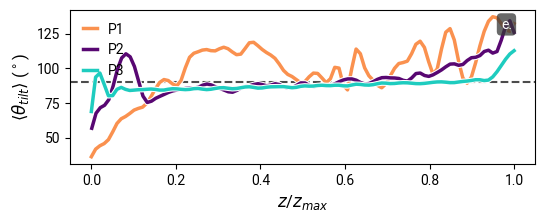

In [6]:
def check_angles(df, id):
    fig, ax = plt.subplots()
    pt = df.loc[dfout["molid"]==id]
    sm = ax.scatter(pt["x"],pt["z"], c=pt["angles"], cmap="viridis", s=50, zorder=3)
    ax.plot(pt["x"],pt["z"], c="k", marker="none", ls="dashed", alpha=0.5)

    for i, row in pt.iterrows():
        if not np.isnan(row['angles']):
            ax.annotate(f"{row['angles']:.1f}", (row['x'], row['z']), fontsize=12, ha='left', va="top", color='red')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="5%", pad=0.1)
    cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', shrink=0.8)
    cbar.ax.tick_params(which='both', size=0)
    cbar.ax.set_ylabel("$\\theta$ ($^\circ$)")
    cbar.outline.set_edgecolor('none')

    # Draw vectors for visualization
    for i, row in pt.iterrows():
        if not np.isnan(row['vx']) and not np.isnan(row['vz']):
            ax.quiver(row['x'], row['z'], row['vx'], row['vz'], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)
            ax.quiver(row['x'], row['z'], row['ux'], row['uz']/5, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5)

            # Get arc endpoints based on angle and position
            center = (row['x'], row['z'])
            arc_radius = 0.1  # Adjust the radius as needed

            # Determine if the angle is clockwise or counterclockwise using cross product
            vector1 = np.array([row['vx'], row['vz']])
            vector2 = np.array([row['ux'], row['uz']])
            cross_product = np.cross(vector1, vector2)
            angle = row['angles']

            if cross_product > 0:
                # Counterclockwise
                start_angle = np.degrees(np.arctan2(row['vz'], row['vx']))
                end_angle = 90 
            else:
                # Clockwise
                start_angle = 90
                end_angle = np.degrees(np.arctan2(row['vz'], row['vx']))


            # Create and add arc patch
            arc = matplotlib.patches.Arc(
                xy=center,
                width=1 * arc_radius,
                height=1 * arc_radius,
                angle=0,
                theta1=start_angle,
                theta2=end_angle,
                color='green',
                linewidth=1
            )
            ax.add_patch(arc)

    stylize_plot(ax, "$x$ (nm)", "$z$ (nm)")
    return fig, ax

from matplotlib.patches import Arc
from math import radians
import matplotlib
from scipy.interpolate import make_interp_spline
import matplotlib

cmap = cmr.guppy
ngroups = 3
colors_dens = cmap(np.linspace(0, 1, ngroups))

bounds = np.arange(len(colors_dens)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.3]
RUNS = ["run1","run2","run3"]
SOLV = "water"
PULL = "equilibrated"
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
NFRAMES = 20

surface_normal = np.array([0,0,1])
fig,ax = plt.subplots(1,1, figsize=(6,2))

jj = 0
for NREP in NREPS:
    out = []
    for DEN in DENS:

        av_angles = []
        dfs = []
        for RUN in RUNS:

            gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.gro"))[-1]
            traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}/*part*.xtc"))[-1]

            get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/{PULL}", SOLV)
            df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
            MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

            universe = MySys.universe
            u = universe.select_atoms("name DMS")
            box = universe.dimensions[:3]


            for ts in range(1,NFRAMES):
                
                coords = u.positions
                coords = MySys.unwrap_coordinates(coords, box)
                coords -= coords.min(axis=0)

                df = pd.DataFrame({"x":coords[:,0], "y":coords[:,1], "z":coords[:,2], "id":u.atoms.ix , "nmon":[float(r[1:]) for r in u.atoms.residues.resnames]})
                df[["x","y","z"]] = df[["x","y","z"]]*.1
                df["lengths"] = df["nmon"]*0.5
                df["z"] -= df["z"].min()
                df = assign_molecule_ids(df)

                dfout = calculate_tilt_angles(df, surface_normal, length=1)
                
                zrange = (df["z"].min(), df["z"].max())
                zbins = np.linspace(zrange[0], zrange[1], 50)

                vals = []
                for i in range(len(zbins)-1):
                    cut = dfout[(dfout["z"]<zbins[i+1]) & (dfout["z"]>=zbins[i])]
                    theta = cut["angles"].mean()
                    std = cut["angles"].std()
                    vals.append([zbins[i],theta])
                
                vals = np.array(vals)
                vals = vals[~np.isnan(vals[:,1])]
                f = make_interp_spline(vals[:,0], vals[:,1])
                x = np.linspace(vals[:,0].min(), vals[:,0].max(), 100)
                y = f(x)

                df = pd.DataFrame({"idx":np.linspace(0,len(y),len(y)), "z":x, "theta":y})
                dfs.append(df)

        df = pd.concat(dfs) 
        out.append(df)

        grouped = df[["idx","z","theta"]].groupby("idx")
        group = grouped.mean()
        #roll = group.rolling(window=5, center=True).mean().dropna()
        
        f = make_interp_spline(group["z"], group["theta"])
        ax.plot(group["z"]/group["z"].max(), group["theta"], color="white", ls="solid", lw=4.0, zorder=1)
        ax.plot(group["z"]/group["z"].max(), group["theta"], color=colors_dens[jj], ls="solid", lw=2.5, zorder=1, label=SAMPLE[NREP])
        
        jj += 1
    
    dfout = pd.concat(out)
    dfout.to_csv(f"{ROOT}/out_files/tilt_angles/tilt_angles_{NREP}.csv", index=False)

ax.text(0.95, 0.95, s=f'e.', transform=ax.transAxes, color='white', ha='right', va='top',
                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))
ax.legend(frameon=False, loc="upper left", handlelength=1)
ax.axhline(90, c="k", ls="dashed", alpha=0.7, zorder=0)
ax.set_xlabel("$z$/$z_{max}$")
ax.set_ylabel("$\\langle \\theta_{tilt} \\rangle$ ($^\circ$)")

fig.subplots_adjust(hspace=0)
fig.savefig(f"{ROOT}/plots/Fig4_tilts.png", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/Fig4_tilts.svg", dpi=400, bbox_inches="tight")

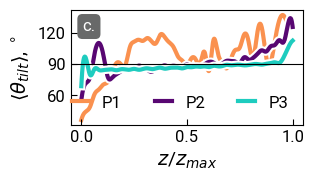

In [11]:
import cmasher as cmr
from scipy.interpolate import make_interp_spline

NREPS = ["K0","K2","K5"]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"

def make_colormap(cmap, ngroups):
    colors_dens = cmap(np.linspace(0, 1, ngroups))
    bounds = np.arange(len(colors_dens)+1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return colors_dens, sm

colors_tilt, sm_tilt = make_colormap(cmr.guppy, 3)
fig,ax_tilt = plt.subplots(1,1, figsize=(3,1.5))

jj = 0
for NREP in NREPS:

    tilts = pd.read_csv(f"{ROOT}/out_files/tilt_angles/tilt_angles_{NREP}.csv")
    group = tilts[["idx","z","theta"]].groupby("idx").mean()

    f = make_interp_spline(group["z"], group["theta"])
    x = np.linspace(group["z"].min(), group["z"].max(),1000)
    ax_tilt.plot(x/x.max(), f(x), color="white", ls="solid", lw=6.0, zorder=1)
    ax_tilt.plot(x/x.max(), f(x), color=colors_tilt[jj], ls="solid", lw=3, zorder=1, label=SAMPLE[NREP])

    jj += 1

stylize_plot(ax_tilt,"$z$/$z_{max}$","$\\langle \\theta_{tilt} \\rangle$, $^\circ$", hide=None)
ax_tilt.text(0.05, 0.92, s=f'c.', transform=ax_tilt.transAxes, size=12, color='white', ha='left', va='top',
                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))
ax_tilt.legend(frameon=False, loc="lower right", handlelength=1, ncol=3, fontsize=12)
ax_tilt.axhline(90, c="k", ls="solid", alpha=1, lw=0.8, zorder=3)
ax_tilt.set_yticks([60,90,120])

fig.savefig(f"{ROOT}/plots/Fig4_tilts.png", dpi=600, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/Fig4_tilts.svg", dpi=600, bbox_inches="tight")

# Gyration Radius

In [ ]:
import subprocess
from MDAnalysis.lib.distances import calc_bonds
pd.options.mode.chained_assignment = None  # default='warn'


def get_molSizes(folder, SOLV):
    command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
    subprocess.run(f"cd {folder};"+
                        command,
                        shell=True, executable="/bin/bash")

def assign_molecule_ids(df):
    # Sort DataFrame by length to maintain the sequential order
    #df = df.sort_values(by=['nmon','lengths', 'x', 'y', 'z']).reset_index(drop=True)
    current_length = None
    current_id = 0

    grouped = df.groupby('nmon')

    index = 0
    dfs = []
    for i, group in grouped:
        nmon = group['nmon'].unique()[0]
        if len(group) != nmon-1 :
            nmols = int(len(group)/(nmon-1))

            for n in range(nmols-1):
                dfp = group.iloc[n*int(len(group)/nmols):(n+1)*int(len(group)/nmols)]
                dfp["molid"] = index
                dfs.append(dfp)
                index += 1
        else:
            dfp = group
            dfp["molid"] = index
            dfs.append(dfp)
            index += 1

    df = pd.concat(dfs)
    return df


ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2"]
DENS = [0.3]
SOLV = "water"
RUNS = ["run1"]
BINS = { "K0":10, "K1":20, "K2":20, "K5":25 }
FRAMES = 1

import matplotlib
cmap = matplotlib.colormaps['twilight_shifted']
ngroups = 6
colors_dens = cmap(np.linspace(0, 1, ngroups))

bounds = np.arange(len(colors_dens)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
mol = "DMS"

LcutList = {}
colors = ["red","blue","green","black","gray"]

#fig,axes = plt.subplots(3,ngroups, figsize=(8,8), sharey="row", sharex=True)
#fig1, axes1 = plt.subplots(3,1, figsize=(4,6), gridspec_kw={"height_ratios":(1,1,1)})
cbars = []

for NREP in NREPS:
    out = []

    for DEN in DENS:
        Rg_run = {}
        maxL = 0
        maxZ = 0
        dfs = {}
        for RUN in RUNS:

            gro = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*part*.gro"))[-1]
            traj = natsorted(glob(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/*nojump*.xtc"))[-1]

            get_molSizes(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated", SOLV)
            df_molsizes = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
            MySys = Grafting.NewSystem(gro=gro, traj=traj, molSizes=df_molsizes["nmol"].sort_values().values)

            u = MySys.universe
            PDMS = u.select_atoms(f"name {mol}", updating=True)
            BASE = u.select_atoms("name N1L1 or name N1L")
            z_base = BASE.positions[:,2].max()
            for atom in PDMS:
                atom.mass = 72

            #MDAnalysis.lib.mdamath.make_whole()

            df = pd.DataFrame({"x":PDMS.atoms.positions[:,0], "y":PDMS.atoms.positions[:,1], "z":PDMS.atoms.positions[:,2], "id":PDMS.atoms.ix ,
                                "nmon":[int(r[1:]) for r in PDMS.atoms.residues.resnames], "lengths":[float(r[1:])*0.5 for r in PDMS.atoms.residues.resnames]})
            df = assign_molecule_ids(df)
            df[["x","y","z"]] = df[["x","y","z"]]*.1
            df["z"] -= z_base*.1


            if df["z"].max()>maxZ:
                maxZ = df["z"].max()
            if df["lengths"].max()>maxL:
                maxL = df["lengths"].max()

            dfs[RUN] = df

            print(maxZ)

        for RUN in RUNS:
            print(NREP, DEN, RUN)
            Lcuts = np.linspace(0,maxL,ngroups+1)
            Zcuts = np.linspace(0,maxZ,ngroups+1)

            df = dfs[RUN]
            Rg_run[RUN] = {}
        
            for i in tqdm(range(len(Zcuts)-1)):
                Rg_run[RUN][i] = {}
                cut1 = df[(df["z"] >= Zcuts[i]) & (df["z"] <= Zcuts[i+1])]
                
                for j in range(len(Lcuts)-1):
                    cut = cut1[((cut1["lengths"] >= Lcuts[j])) & (cut1["lengths"] <= Lcuts[j+1])]
                    
                    grouped = cut.groupby("molid")
                    Rg_run[RUN][i][j] = []

                    ii = 0
                    for K,group in grouped:
                        ids = group["id"].values
                        molid = group["molid"].values
                        selections = " or ".join(["index "+str(id) for id in ids])
                        sel = PDMS.select_atoms(selections,  updating=True)

                        ii += 1

                        # Assuming the chain has at least two atoms
                        if len(sel) >= 2:
                            Rg_traj = []
                            for ts in u.trajectory[-FRAMES:]:

                                Rg = sel.radius_of_gyration()
                                Rg_traj.append(Rg*.1)

                            Rg = np.mean(Rg_traj)
                            Rg_run[RUN][i][j].append(np.mean(Rg_traj))
                            out.append([K, Zcuts[i+1], Lcuts[j+1], Rg, DEN, RUN])

    df_out = pd.DataFrame(out, columns=["idx", "z","lengths","Rg","dens","run"])
    df_out.to_csv(f"{ROOT}/out_files/roughness/Rg_layers_{NREP}.csv", index=False)

                

In [ ]:
import matplotlib
import cmasher as cmr

#cmap = matplotlib.colormaps['turbo']
cmap = cmr.bubblegum_r
ngroups = 6
colors_dens = cmap(np.linspace(0, 1, ngroups))

bounds = np.arange(len(colors_dens)+1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axes = plt.subplots(3,1, figsize=(3,5), sharey=True, gridspec_kw={"height_ratios":(1,1,1), "hspace":0.3})

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]

cbars = []
for NREP,ax in zip(NREPS,axes):

    print(NREP)
    
    df = pd.read_csv(f"{ROOT}/out_files/roughness/Rg_layers_{NREP}.csv")

    Lcuts = df["lengths"].unique()

    df = df[(df["dens"] == 0.3)]
    Zcuts = df["z"].unique()

    grouped = df.groupby("z")

    colors = {int(Lcuts[i]):colors_dens[i] for i in range(len(colors_dens))}
    ax.set_xlim(Zcuts[0]-Zcuts[-1]*.1, Zcuts[-1]+Zcuts[-1]*.1)

    Rg_avs = []
    for i,group in grouped:
        print
        subgroups = group[["z","lengths","dens","Rg"]].groupby("lengths")
        j = 0
        avgs = []
        for k, subgroup in subgroups:
            L = subgroup["lengths"].mean()
            ax.errorbar(subgroup["z"].mean(), subgroup["Rg"].mean(), subgroup["Rg"].std(), color=colors[int(L)], marker="s", mec="none", ms=8, alpha=0.8)
            
            avgs.append(subgroup["Rg"].mean())
            j += 1

        Rg_av = np.mean(avgs)
        Rg_avs.append(Rg_av)

    ax.axhline(y=Rg_avs[-1], c="k", ls="dashed")

    #ax.set_ylim(-5,21.5)
    #ax.set_yticks([0,3,6])
    #ax.fill_betweenx([-5,21], Zcuts[1], Zcuts[2], alpha=0.3, color="xkcd:light gray", zorder=-2)
    #ax.fill_betweenx([-5,21], Zcuts[3], Zcuts[4], alpha=0.3, color="xkcd:light gray", zorder=-2)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="3%", pad=0.03)
    cbar = fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', location="right", ticks=np.linspace(0, ngroups, ngroups+1))
    cbar.ax.set_yticklabels([0]+[int(l) for l in Lcuts[:]], ha='left')
    cbar.ax.tick_params(which='both', size=0)
    cbar.outline.set_edgecolor('none')
    cbars.append(cbar)

cbars[1].ax.set_ylabel("Chain length (nm)", labelpad=10)
axes[-1].set_xlabel("$z$ (nm)")
axes[1].set_ylabel("$\\langle R_g \\rangle$ (nm)")
#axes[0].set_xticks([0.5,1,1.5,2])
#axes[1].set_xticks([1,2,3,4,5])
#axes[2].set_xticks([3,6,9,12,15,18])

fig.savefig(f"{ROOT}/plots/Fig4_Rgs.svg", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/Fig4_Rgs.png", dpi=400, bbox_inches="tight")


## Fig 4 (Old version)

In [ ]:
# Fig 4

def make_colormap(cmap, ngroups):
    colors_dens = cmap(np.linspace(0, 1, ngroups))
    bounds = np.arange(len(colors_dens)+1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    return colors_dens, sm

from scipy.interpolate import make_interp_spline
import cmasher as cmr

colors_tilt, sm_tilt = make_colormap(cmr.guppy, 3)
colors_Rg, sm_Rg = make_colormap(cmr.bubblegum_r, 6)


ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}


fig,axes = plt.subplots(5,1, figsize=(3,9), gridspec_kw={"height_ratios":(1,1,1,0.1,2),"hspace":0.3})
axes[-2].set_axis_off()

jj = 0
cbars = []
axes_Rg = axes[:-2]
for NREP,ax,letter in zip(NREPS,axes_Rg,["d.i","d.ii","d.iii"]):

    Rgs = pd.read_csv(f"{ROOT}/out_files/roughness/Rg_layers_{NREP}.csv")
    Lcuts = Rgs["lengths"].unique()
    Rgs = Rgs[(Rgs["dens"] == 0.3) & (Rgs["run"]=="run1")]
    Zcuts = Rgs["z"].unique()

    grouped = Rgs.groupby("z")
    colors = {int(Lcuts[i]):colors_Rg[i] for i in range(len(colors_Rg))}
    ax.set_xlim(Zcuts[0]-Zcuts[-1]*.1, Zcuts[-1]+Zcuts[-1]*.1)
    ax.text(0.05, 0.90, s=letter, transform=ax.transAxes, color='white', ha='left', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))
    ax.text(0.95, 0.90, s=SAMPLE[NREP], transform=ax.transAxes, color='white', ha='right', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))

    Rg_avs = []
    for i,group in grouped:
        print
        subgroups = group[["z","lengths","dens","Rg"]].groupby("lengths")
        j = 0
        avgs = []
        for k, subgroup in subgroups:
            L = subgroup["lengths"].mean()
            ax.errorbar(subgroup["z"].mean(), subgroup["Rg"].mean(), subgroup["Rg"].std(), color=colors[int(L)], marker="s", mec="none", ms=8, alpha=0.8)
            
            avgs.append(subgroup["Rg"].mean())
            j += 1

        Rg_av = np.mean(avgs)
        Rg_avs.append(Rg_av)

    ax.axhline(y=Rg_avs[-1], c="k", ls="dashed")
    ax.fill_betweenx([-5,21], Zcuts[1], Zcuts[2], alpha=0.3, color="xkcd:light gray", zorder=-2)
    ax.fill_betweenx([-5,21], Zcuts[3], Zcuts[4], alpha=0.3, color="xkcd:light gray", zorder=-2)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="3%", pad=0.03)
    cbar = fig.colorbar(sm_Rg, ax=ax, cax=cax, orientation='vertical', location="right", shrink=0.8, ticks=np.linspace(0, 6, 6+1))
    cbar.ax.set_yticklabels([0]+[int(l) for l in Lcuts[:]], ha='left')
    cbar.ax.tick_params(which='both', size=0)
    cbar.outline.set_edgecolor('none')
    cbar.set_ticks([cbar.vmin, cbar.vmax])

    cbars.append(cbar)

cbars[1].ax.set_ylabel("Chain length, nm", labelpad=10)
axes_Rg[0].set_xticks([0.5,1,1.5,2])
axes_Rg[1].set_xticks([1,2,3,4,5])
axes_Rg[2].set_xticks([3,6,9,12,15,18])
axes_Rg[-1].set_xlabel("$z$, nm")
axes_Rg[1].set_ylabel("$\\langle R_g \\rangle$, nm")

ax_tilt = axes[-1]
jj = 0
for NREP in NREPS:

    tilts = pd.read_csv(f"{ROOT}/out_files/tilt_angles/tilt_angles_{NREP}.csv")
    group = tilts[["idx","z","theta"]].groupby("idx").mean()

    f = make_interp_spline(group["z"], group["theta"])
    ax_tilt.plot(group["z"]/group["z"].max(), group["theta"], color="white", ls="solid", lw=4.0, zorder=1)
    ax_tilt.plot(group["z"]/group["z"].max(), group["theta"], color=colors_tilt[jj], ls="solid", lw=2.5, zorder=1, label=SAMPLE[NREP])

    jj += 1

ax_tilt.text(0.95, 0.95, s=f'e.', transform=ax_tilt.transAxes, color='white', ha='right', va='top',
                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))
ax_tilt.legend(frameon=False, loc="upper left", handlelength=1)
ax_tilt.axhline(90, c="k", ls="dashed", alpha=0.7, zorder=0)
ax_tilt.set_xlabel("$z$/$z_{max}$")
ax_tilt.set_ylabel("$\\langle \\theta_{tilt} \\rangle$, $^\circ$")
 
fig.savefig(f"{ROOT}/plots/Fig4_part2.png", dpi=400, bbox_inches="tight")
fig.savefig(f"{ROOT}/plots/Fig4_part2.svg", dpi=400, bbox_inches="tight")

# Chain length distribution

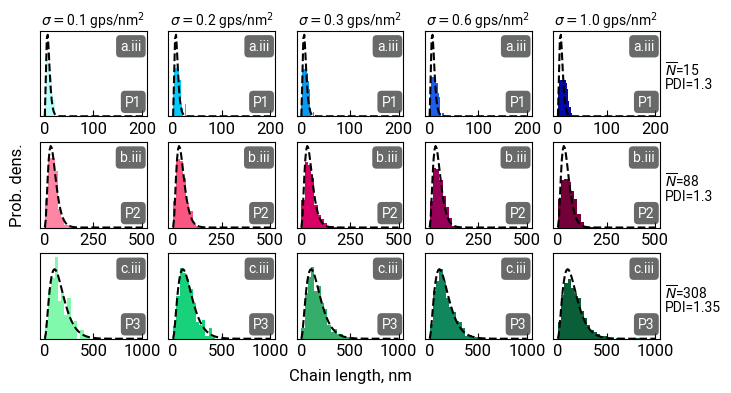

In [27]:
from scipy.stats import gamma
from scipy.integrate import simpson
import subprocess

PDI = { "K0":1.3, "K1":1.3, "K2":1.3, "K5":1.35 }
N = { "K0":15, "K1":72, "K2":88, "K5":308, "50":50, "100":100, "300":300 }

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
DENS = [0.1,0.2,0.3,0.6,1.0]
SOLV = "water"
RUNS = ["run1","run2","run3"]
RANGES = {"K0":(0,400*.5), "K2":(0,1000*.5), "K5":(0,2000*.5)}
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
NBINS = {"K0":100, "K2":30, "K5":30}

fig,axes = plt.subplots(3,5, figsize=(8,4), sharex="row", sharey="row", gridspec_kw={"hspace":0.3})
letters = np.array([['a.i','a.ii','a.iii','a.iv','a.v'],['b.i','b.ii','b.iii','b.iv','b.v'],['c.i','c.ii','c.iii','c.iv','c.v']])

for i,NREP in enumerate(NREPS):
    for j,DEN in enumerate(DENS):
        ax = axes[i,j]
        dfs = []

        for j,RUN in enumerate(RUNS):

            command = rf'grep "pdms_" "{SOLV}_pull.top" | awk {{"{{gsub(/[^0-9]/, \" \"); print $1}}"}} > "molSizes.dat"'
            subprocess.run(f"cd {ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated;"+
                            command,
                            shell=True, executable="/bin/bash")
        
            df = pd.read_csv(f"{ROOT}/{NREP}/{DEN}/{RUN}/{SOLV}/equilibrated/molSizes.dat", names=["nmol"])
            df["nmol"] = df["nmol"]*0.5
            dfs.append(df)

        df = pd.concat(dfs)

        delta = RANGES[NREP][1] - RANGES[NREP][0]
        dx = 2 
        nbins = int(delta/dx)
        ax.hist(df["nmol"], range=RANGES[NREP], bins=NBINS[NREP], color=COLOR_GRADIENT[f"{NREP},{DEN}"], density=True, alpha=1, histtype="stepfilled")

        Ns = N[NREP]*0.5
        PDIs = PDI[NREP]

        x = np.linspace(RANGES[NREP][0], RANGES[NREP][1], 100)
        a = 1/(PDIs-1)
        b = a
        y = gamma.pdf(x, a, scale=Ns/b)
        norm = simpson(y, x=x)
        ax.plot(x,y/norm, c="k", ls="dashed")
        ax.set_yticks([])
        stylize_plot(ax,"","",hide=None)


        ax.text(0.95, 0.9, s=letters[i,j], transform=ax.transAxes, color='white', ha='right', va='top',
                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))
        ax.text(0.95, 0.25, s=SAMPLE[NREP], transform=ax.transAxes, color='white', ha='right', va='top',
                        bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round",))

for ax,DEN in zip(axes[0,:],DENS):
    ax.text(0.5, 1.25, s=f"$\\sigma=${DEN} gps/nm$^2$", transform=ax.transAxes, color='k', ha='center', va='top')
    
for i,ax in enumerate(axes[:,-1]):
    Ns = N[NREPS[i]]
    PDIs = PDI[NREPS[i]]
    ax.text(1.05, 0.65, s="$\\overline{N}$"+f"={Ns}", transform=ax.transAxes, color='black', ha='left', va='top')
    ax.text(1.05, 0.45, s="PDI"+f"={PDIs}", transform=ax.transAxes, color='black', ha='left', va='top')
    
axes[0,0].set_xticks([0,100,200])
axes[1,0].set_xticks([0,250,500])
axes[2,0].set_xticks([0,500,1000])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, nm")
plt.ylabel("Prob. dens.", labelpad=-10)

fig.savefig(f"{ROOT}/plots/length_dist.png", dpi=450, bbox_inches="tight")

/scratch/tmp/ipykernel_157823/2397770110.py:23: DeprecationWarning: You are passing x=[ 505.05050505  515.15151515  525.25252525  535.35353535  545.45454545
  555.55555556  565.65656566  575.75757576  585.85858586  595.95959596
  606.06060606  616.16161616  626.26262626  636.36363636  646.46464646
  656.56565657  666.66666667  676.76767677  686.86868687  696.96969697
  707.07070707  717.17171717  727.27272727  737.37373737  747.47474747
  757.57575758  767.67676768  777.77777778  787.87878788  797.97979798
  808.08080808  818.18181818  828.28282828  838.38383838  848.48484848
  858.58585859  868.68686869  878.78787879  888.88888889  898.98989899
  909.09090909  919.19191919  929.29292929  939.39393939  949.49494949
  959.5959596   969.6969697   979.7979798   989.8989899  1000.        ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral = simpson(y,x)


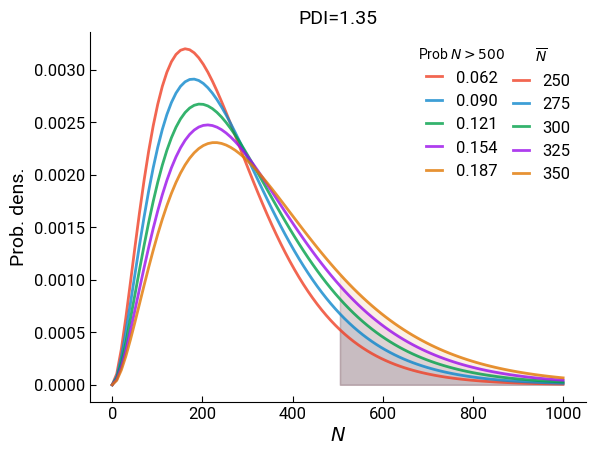

In [42]:
from scipy.stats import gamma
from scipy.integrate import simpson
ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"


fig, ax = plt.subplots()
colors = ["xkcd:tomato", "xkcd:water blue", "xkcd:emerald", "xkcd:violet", "xkcd:pumpkin"]

leg2, labs2 = [], []
PDI = 1.35
for N,c in zip((250,275,300,325,350), colors):
    x = np.linspace(0, 1000, 100)
    a = 1/(PDI-1)
    b = a
    y = gamma.pdf(x, a, scale=N/b)
    norm = simpson(y, x=x)
    l1, = ax.plot(x,y/norm, label=N, lw=2, c=c, alpha=0.8)

    cut = x>500
    x = x[cut]
    y = y[cut]
    ax.fill_between(x,0,y, color=c, alpha=0.1)
    integral = simpson(y,x)

    leg2.append(l1)
    labs2.append(f"{integral:.3f}")

ax.set_title("PDI=1.35", size=14)
leg1 = ax.legend(frameon=False, fontsize=12, title="$\\overline{N}$", handlelength=1)
ax.add_artist(leg1)

# Create the second legend
leg2 = ax.legend(handles=leg2, labels=labs2, loc='upper center', frameon=False, fontsize=12, handlelength=1, title='Prob $N>500$', bbox_to_anchor=(0.75,1))

stylize_plot(ax, "$N$", "Prob. dens.")
fig.savefig(f"{ROOT}/plots/probs.png", dpi=400, bbox_inches='tight')

# Layer Heights and density profiles

In [ ]:
def plot_d(ax,df,NREP,color,label,marker):
    grouped = df.groupby("dens")

    Ls, stds, dens = [], [], []
    for i,group in grouped:
        L = group["L"].mean()
        std = np.sqrt(np.sum(group["L_std"]**2))/len(group)
        den = group["dens"].values
        Ls.append(L)
        stds.append(std)
        dens.append(i)
    print(NREP, dens, Ls, stds)
    h = ax.errorbar(dens, Ls, stds, ls="none", mfc="none", color=color, marker=marker, mec=color, ms=8, label=label)

    return h

fig,ax = plt.subplots(1,2, figsize=(6,3), sharey=True)

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse"
NREPS = ["K0","K2","K5"]
SAMPLE = {"K0":"P1", "K2":"P2", "K5":"P3"}
SOLV = "water"
handles = []
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[0],df,NREP,COLOR_GRADIENT[f"{NREP},0.3"],SAMPLE[NREP],"s")
    handles.append(h)

NREPS = ["K0","K2","K5"]
SOLV = "vacuum"
handles_big = []
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[0],df,NREP,COLOR_GRADIENT[f"{NREP},1.0"],SAMPLE[NREP],"D")
    handles_big.append(h)

paired_list = list(zip(handles, handles_big))
handles = [element for pair in paired_list for element in pair]
labels = ["P1","P1","P2","P2","P3","P3"]

ax[0].legend(handles=handles, labels=labels, loc="upper center", ncol=3, handlelength=-0.5, columnspacing=0.9, markerscale=0.8, fontsize=12, framealpha=1, edgecolor="none", bbox_to_anchor=(0.34,1.27))
ax[0].text(0.64, 1.21, s="50x10 nm$^2$", transform=ax[0].transAxes, size=10, color='k', ha='left', va='top')
ax[0].text(0.64, 1.11, s="80x80 nm$^2$", transform=ax[0].transAxes, size=10, color='k', ha='left', va='top')

ROOT = "/gpfs/scratch/ehpc13/Fabio/PDMS/Monodisperse"
NREPS = ["50","100","300"]
SOLV = "water"
for NREP in NREPS:
    df = pd.read_csv(f"{ROOT}/out_files/height_profiles/L_{NREP}_{SOLV}.csv")
    h = plot_d(ax[1],df,NREP,COLOR_GRADIENT[f"{NREP},0.1"],"M"+f"{NREP}","s")

ax[1].legend(loc="upper center", ncol=3, handlelength=-0.5, columnspacing=0.9, markerscale=0.8, fontsize=12, framealpha=1, edgecolor="none", bbox_to_anchor=(0.53,1.17))





for axis,letter in zip(ax,['a.','b.']):
    #axis.set_xticks([0.1,0.2,0.3])
    #axis.set_yticks([0,5,10,15])
    axis.grid(axis="y", ls="dashed")
    stylize_plot(axis,"","", hide=None)
    axis.text(0.1, 0.9, s=letter, transform=axis.transAxes, size=12, color='white', ha='left', va='top',
                           bbox=dict(facecolor='xkcd:dark grey', alpha=0.75, edgecolor='none', boxstyle="round"))

axfig = fig.add_subplot(111, frameon=False)
axfig.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
axfig.set_xlabel("$\\sigma$, gps/nm$^2$")
axfig.set_ylabel("$d$, nm")

fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/layer_heights.svg", dpi=450, bbox_inches="tight")
fig.savefig(f"/gpfs/scratch/ehpc13/Fabio/PDMS/Polydisperse/plots/layer_heights.png", dpi=450, bbox_inches="tight")


